# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Primero cuatrimestre del 2020**

Grupo n°16 	Grupo Phyton Fiuba

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

Jonathan Galván Pérez| 101250

Ronnie Del Pino      | 93575

Marcelo Mastroianni  | 88782

# Índice
1. Introducción
2. Objetivos
3. Analisis general

    3.1 Importación de datos y análisis preliminar

    3.2 Estructura de los datos
    
    3.3 Datos faltantes
    
    3.4 Limpieza de datos
    
4. Análisis detallado

    4.1 Análisis de los targets
    
    4.2 Relación entre target y keyword
    
    4.3 Análisis del contenido de los tweets
    
        4.3.1 Palabras más frecuentes
        
        4.3.2 Veracidad según los caracteres especiales
        
        4.3.3 Repetición de tweets
    4.4 Análisis de localizaciones
    
    4.5 Relación entre el largo del texto y el target(Falta)    26
    
    4.6 Relación entre location y keyword(falta decir q no encontramos nada)    28
    
    4.7 Relación entre la locación y el largo del texto(Se debería eliminar, con el anterior punto alcanza no decir nada..)

5. Conclusiones(falta)
7. Referencias    28


# 1 Introducción

El objetivo principal del análisis exploratorio de datos permite comprender las mejor las características de un conjunto de datos. Es imprescindible detectar patrones, relaciones, tendencias, valores comunes, valores atípicos que nos permitan comprender la naturaleza de estos.  Para esto se requieren herramientas que nos permita visualizar,  analizar y formular hipótesis.
El modelo a seguir consta de una serie de pasos que debemos seguir en el proceso del análisis exploratorio:

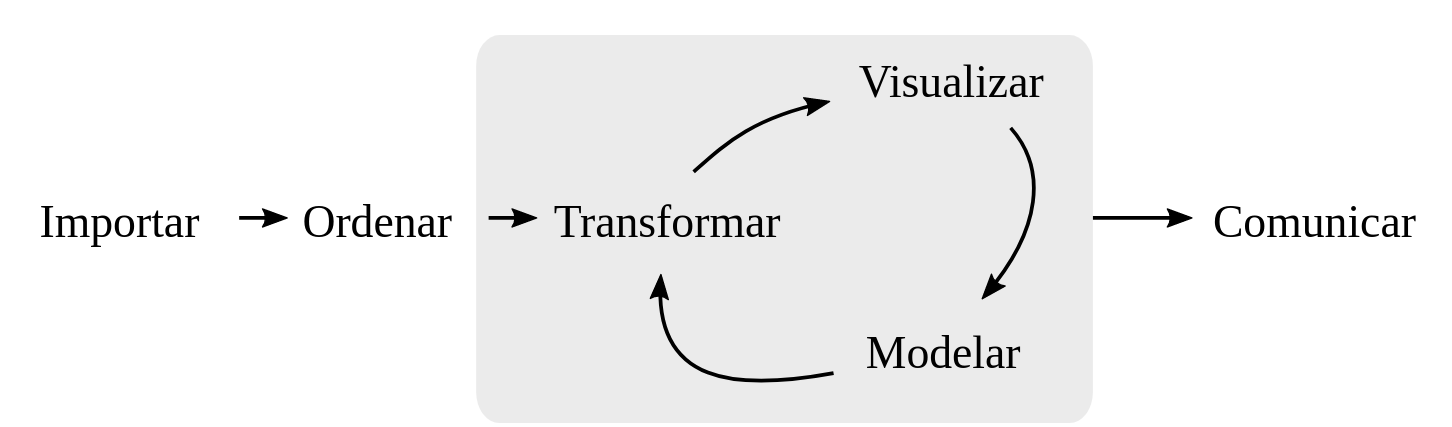

Importamos lo datos desde una fuente de datos. Ordenarlos significa realizar tareas de manera que nuestros datos sean consistentes. En el proceso de transformación en general se reducen los datos a fin de obtener tener datos que sean de nuestro interés. La visualización nos permite comprender relaciones, formular hipótesis e incluso sorprendernos pero siempre teniendo en cuenta la interpretación, es decir, tienen un algún componente de carácter  subjetivo.  El modelado es complementario de la visualización, son modelos matemáticos/computacionales que nos permiten responder cuando tenemos una pregunta con precisión. La etapa de comunicación es de suma importancia, una buena comunicación es imprescindible para que otras personas pueden entender los modelos o visualizaciones. 


# 2. Objetivos

El objetivo del presente trabajo consiste en el análisis profundo de un set de datos a fin  de afianzar los conocimientos adquiridos sobre análisis exploratorio de datos. Para ello utilizamos el registro de tweets que nos ha dado la cátedra.  En general debemos alcanzar y/o  profundizar conocimientos sobre la librerías(Pandas, Seaborn, etc.), extraer o crear variables que consideremos relevantes, detectar valores faltantes o valores atípicos, patrones, tendencias, visualizar relaciones entre variables, comunicar resultados, etc.


# 3. Analisis general
En esta sección se realizará la importación del set  datos, un muestreo preliminar, estructura y datos faltantes. 

## 3.1 Importación de datos y análisis preliminar
Se dispone de un archivo csv que nos brinda información sobre distintos tweets. Cada línea del archivo nos da información sobre un tweet en particular. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo. Para ello usando el método head()  mostramos los primeros cinco registros.

In [134]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)


In [135]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 3.2 Estructura de los datos
Mostramos el tamaño del DataFrame usando el atributo 'shape' donde se muestra la tupla (m, n) donde m y n son la cantidad de filas y columnas respectivamente:

In [136]:
df.shape

(7613, 5)

Disponemos de un set de 7613 filas por 5 columnas.
Luego mostramos características de los datos: Tipos de datos, valores faltantes y el tamaño en memoria:

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


De la tabla anterior se podemos filtrar datos por el tipo(int y object) para obtener información que nos pueda parecer relevante:

In [138]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,"7,613.00","5,441.93","3,137.12",1.00,"2,734.00","5,408.00","8,146.00","10,873.00"
target,"7,613.00",0.43,0.50,0.00,0.00,0.00,1.00,1.00


Dado que el 'target' alterna entre valores 1 y 0 no nos aporta información que consideramos importante para estas mediciones(mean, std, min, etc). De igual manera el campo 'id' no aporta datos relevantes ya que solo representan un valor identificatorio para las filas(único por tweet).

In [139]:
df.describe(include=[np.object]).T

,count,unique,top,freq
keyword,7552,221,fatalities,45
location,5080,3341,USA,104
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10


In [140]:
df['id'].unique().size #Chequeo q los id sean únicos.

7613

En este caso sí podemos apreciar información que nos parece relevante. Se aprecian repeticiones en los campos keyword, location e incluso en el campo text. También se observan cantidades diferentes para los 3 campos lo que nos hace deducir la existencia de valores nulos en los campos keyword y location.

## 3.3 Datos faltantes
No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

In [141]:
columnas = ['id', 'text', 'target', 'keyword', 'location']
nulls = pd.DataFrame(df[columnas].isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls = nulls.reset_index()
nulls

,index,nulls,porcentaje
0,id,0,0.00
1,text,0,0.00
2,target,0,0.00
3,keyword,61,0.80
4,location,2533,33.27


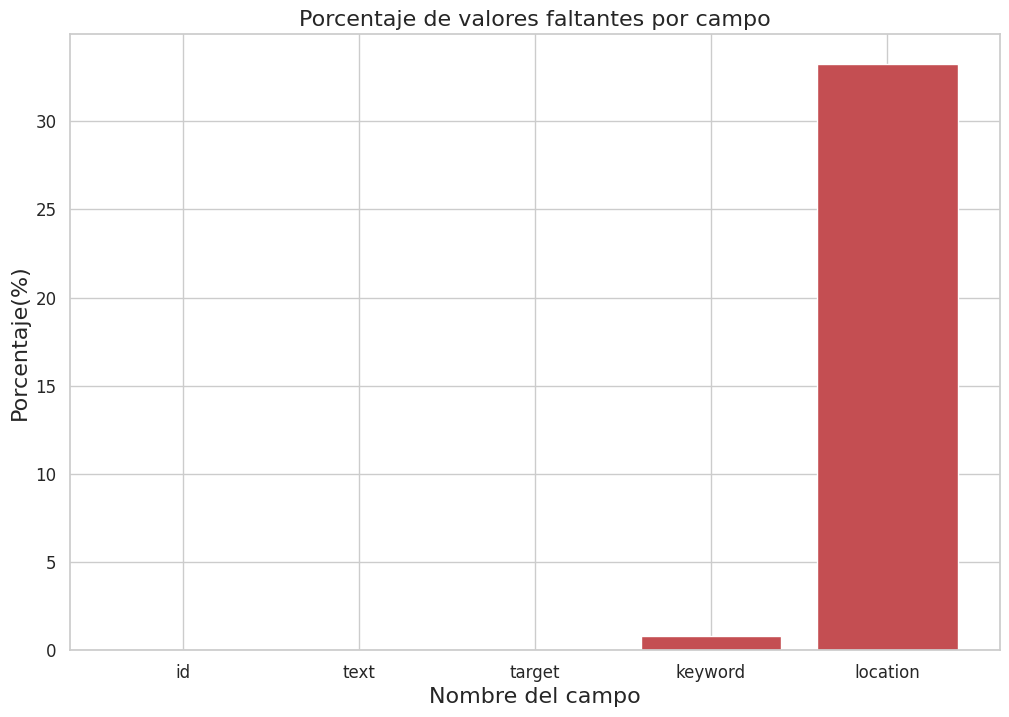

In [142]:
# Tamaño
plt.figure(figsize=(12,8))
# Título
plt.title('Porcentaje de valores faltantes por campo', fontsize=16)
# Eje X
plt.xlabel('Nombre del campo')
# Eje Y
plt.ylabel('Porcentaje(%)')
plt.bar(height=nulls["porcentaje"], x=nulls["index"], color='C3')

plt.show()

En el gráfico podemos observar que el DataFrame, en general, está bastante completo, la columna "location" tiene un gran porcentaje de los datos faltantes mientras que "keyword" apenas tiene algunos datos nulos, esto va a ser muy conveniente a la hora de analizar los datos.

## 3.4 Limpieza de datos

Esta tarea la debemos realizar  de tal maner que al usarlos tengamos datos correctos. Este análisis incluye la posibilidad de corregirlos o eliminarlos.
En la tabla anterior podemos observar que tenemos 61 y 2533 valores faltantes para los campos keyword y location respectivamente.

In [143]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Los valores nulos en los campos  location y keyword serán reemplazados por cadenas de carecteres con valores 'sin location' y 'sin keyword' respectivamente.

In [144]:
df['location'].fillna(value='sin location', inplace=True)
df['keyword'].fillna(value='sin keyword', inplace=True)
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

## 4. Análisis detallado

En esta sección se realizará un análisis pormenorizado de los datos, entre otros análisis se deberán tener en cuenta las siguientes:
Crear nuevas variables.
Búsqueda de  patrones.
Detectar relaciones.
Realizar visualizaciones.
Formular hipótesis, etc.
Dar respuesta a nuestras preguntas o hipótesis, etc.

## 4.1 Análisis de los targets

Analizaremos los porcentajes que componen dentro del set de datos, es decir, qué porcentaje de los tweets son verdaderos y falsos. Target 1 para los verdaderos y 0 para los falsos. 
Realizamos una visualización:

<Figure size 100x100 with 0 Axes>

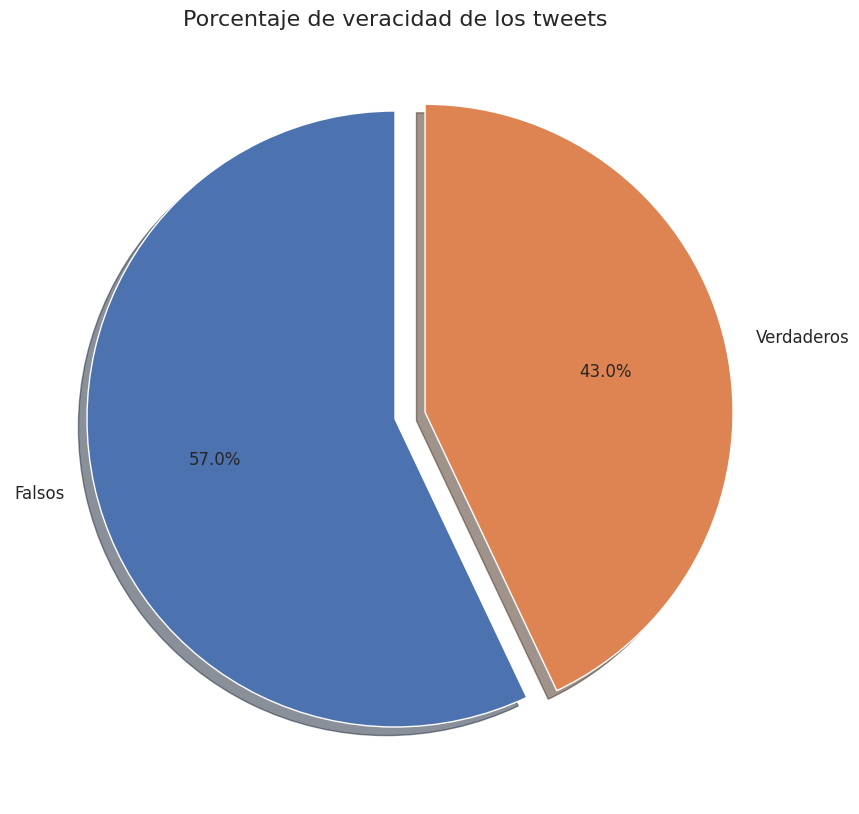

In [145]:
tweets_reales = df[df['target'] == 1]
tweets_falsos = df[df['target'] == 0]
cant_verdaderos = tweets_reales['target'].count()
cant_falsos = tweets_falsos['target'].count()

# Tamaño
plt.figure(figsize=(1,1))
fig1, ax1 = plt.subplots()
ax1.pie([cant_falsos, cant_verdaderos], explode=(0, 0.1), labels=['Falsos', 'Verdaderos'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Porcentaje de veracidad de los tweets", fontsize=16)
plt.show()

Se observa que más de la mitad de los tweets del set de datos son falsos lo que nos indicaría, a priori, hay una tendencia de los usuarios a propagar rumores(“noticias”) sin ser  verificadas. 

## 4.2 Relación entre target y keyword

En esta sección analizaremos a las "keywords" o "palabras claves" y cómo se relacionan con la veracidad de los tweets. Comenzaremos con un vistazo general a las keywords mostrando la frecuencia de repetición de estas.

In [146]:
keywords = pd.DataFrame(df['keyword'].value_counts())
keywords.columns = ['cantidad']
keywords.T

,sin keyword,fatalities,armageddon,deluge,damage,harm,body%20bags,sinking,fear,collided,...,volcano,battle,bush%20fires,war%20zone,rescue,forest%20fire,epicentre,threat,inundation,radiation%20emergency
cantidad,61,45,42,42,41,41,41,41,40,40,...,27,26,25,24,22,19,12,11,10,9


Tenemos 222 palabras claves diferentes(incluido el valor impuesto ‘sin keyword’)  y todas se repiten una cantidad considerable de veces por lo que casi no podemos filtrar ninguna. Veremos cuántos palabras se repiten aproximadamente la misma cantidad de veces:

Text(0, 0.5, 'Cantidad de keyword')

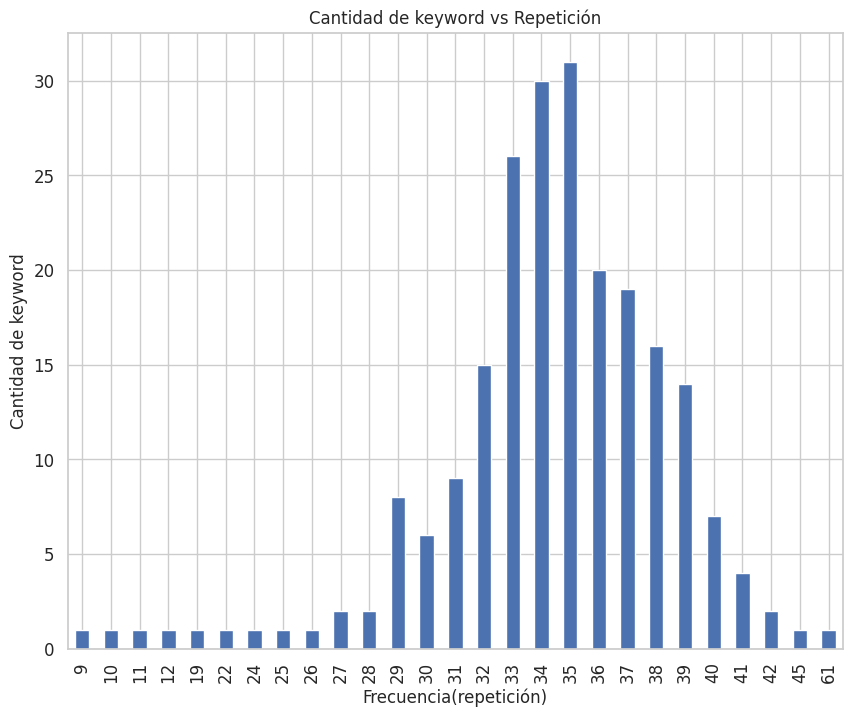

In [147]:
keywords_size = keywords.groupby(['cantidad'])['cantidad'].agg('size')
keywords_size.plot(kind="bar",  figsize=(10, 8), title = 'Cantidad de keyword vs Repetición' )
plt.xlabel('Frecuencia(repetición)', fontsize= 12)
plt.ylabel("Cantidad de keyword", fontsize= 12)

Efectivamente hay bastantes palabras claves que comparten el número de veces que aparecen, tenemos 15 palabras claves que se repiten 32 veces, hay 30 que se repiten 34 veces,etc. Casi todas aparecen más de 30 veces así que si quisiéramos graficar las palabras claves que más aparecen, tendremos que filtrar la mayoría ya que sino nos quedaría un gráfico saturado y poco entendible.
A continuación veremos cuales son las palabras claves más y menos utilizadas filtrando de acuerdo a la cantidad de repeticiones. Como que la concentración de repetición está entre valores 32 y 38 vamos a filtrar valores fuera de ese rango.   
Veamos las palabras que se repiten más de 38 veces:

Text(0, 0.5, 'Cantidad de apariciones')

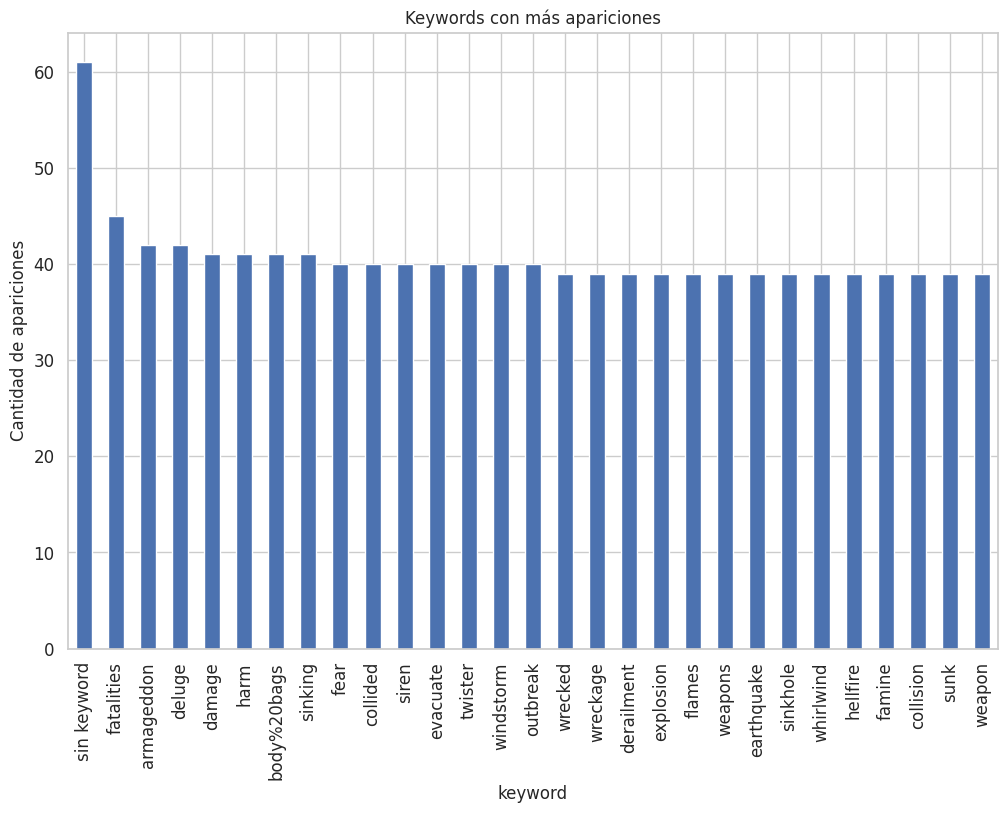

In [148]:
keywords_filtradas = keywords.loc[keywords.cantidad > 38]
keywords_filtradas["cantidad"].plot(kind="bar",title = 'Keywords con más apariciones' , figsize=(12,8))
plt.xlabel('keyword', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

"Fatalidades" es la palabra clave con más repeticiones seguida de "armageddon" y "delunge". Se observa que la totalidad de las palabras claves tienen que ver con desastres, accidentes, inundaciones, etc. También se puede apreciar que hay una cantidad de repetición de valores entre 32 y 38 por lo  dicho en el párrafo anterior.

Ahora nos fijaremos en las palabras claves menos usadas, de igual forma filtraremos y nos quedaremos con las que aparecen menos de 32 veces:

Text(0, 0.5, 'Cantidad de apariciones')

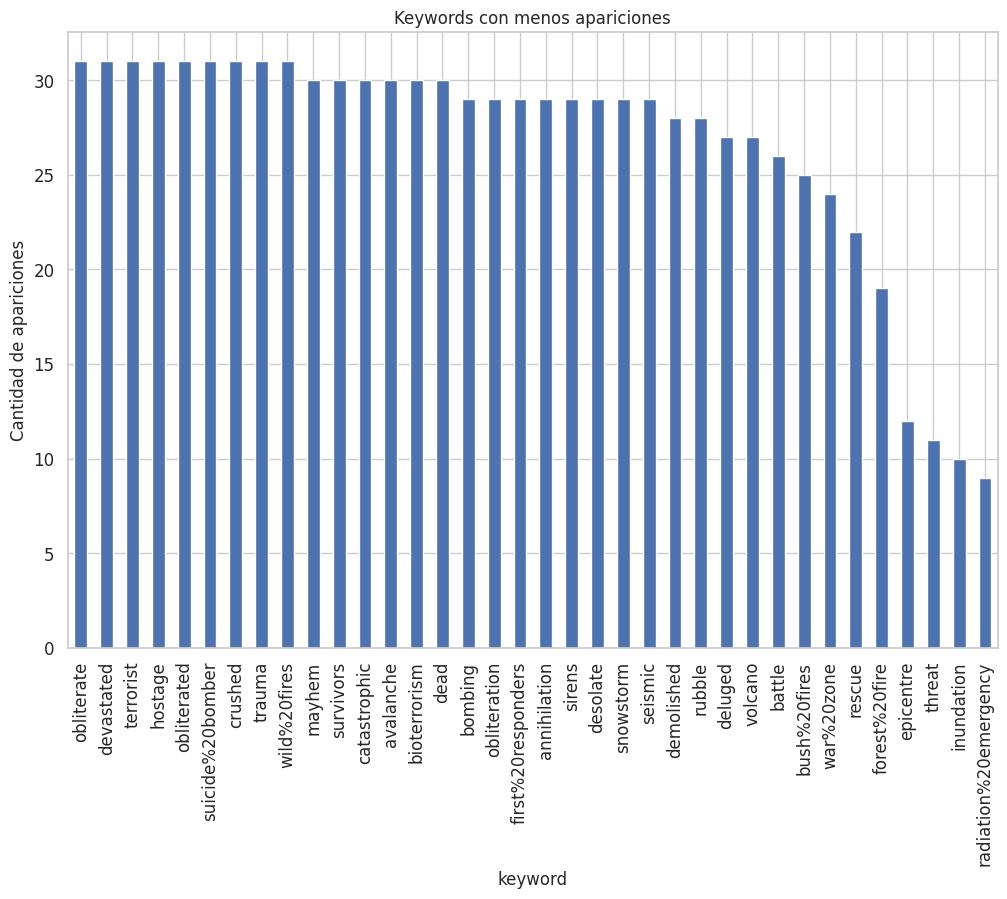

In [149]:
keywords_filtradas = keywords.loc[keywords.cantidad < 32]
keywords_filtradas["cantidad"].plot(kind="bar",title = 'Keywords con menos apariciones' , figsize=(12,8))
plt.xlabel('keyword', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Las keywords menos usadas también tienen relación con desastres por lo que el análisis no es muy útil o significativo.

Ahora veremos cómo se relacionan las keywords con el target, es decir, para una determinada keyword qué porcentaje de los tweets son verdaderos o falsos.  Se tomarán en cuenta aquellas keyword que se hayan repetido al menos 30 veces.

En este primer análisis buscaremos cuáles son las 50 keywords que más se usan en tweets verdaderos:

In [150]:
ranking = 50

ndf = df.groupby(['keyword', 'target']).agg({'target': 'count'})
ndf = ndf.unstack(level=1)
ndf = ndf.reset_index()
ndf = ndf.droplevel(0, axis=1)
ndf.columns=['keyword', 'Tweets falsos', 'Tweets verdaderos'] 
ndf['Tweets verdaderos'].fillna(0, inplace=True)
ndf['Tweets falsos'].fillna(0, inplace=True)
ndf['keyword'].fillna('empty', inplace=True)
ndf = ndf.set_index('keyword')
ndf = ndf[(ndf['Tweets verdaderos'] + ndf['Tweets falsos']) > 30] # Aparición de 'keyword' mayor a 30 veces
ndf = ndf.apply(lambda x: x*100/sum(x), axis=1)
top_falsos = ndf.sort_values('Tweets falsos', ascending=False).head(ranking)
top_verdaderos = ndf.sort_values('Tweets verdaderos', ascending = False).head(ranking)
top_verdaderos


,Tweets falsos,Tweets verdaderos
keyword,,
debris,0.00,100.00
wreckage,0.00,100.00
derailment,0.00,100.00
outbreak,2.50,97.50
typhoon,2.63,97.37
oil%20spill,2.63,97.37
suicide%20bombing,3.03,96.97
suicide%20bomber,3.23,96.77
rescuers,8.57,91.43


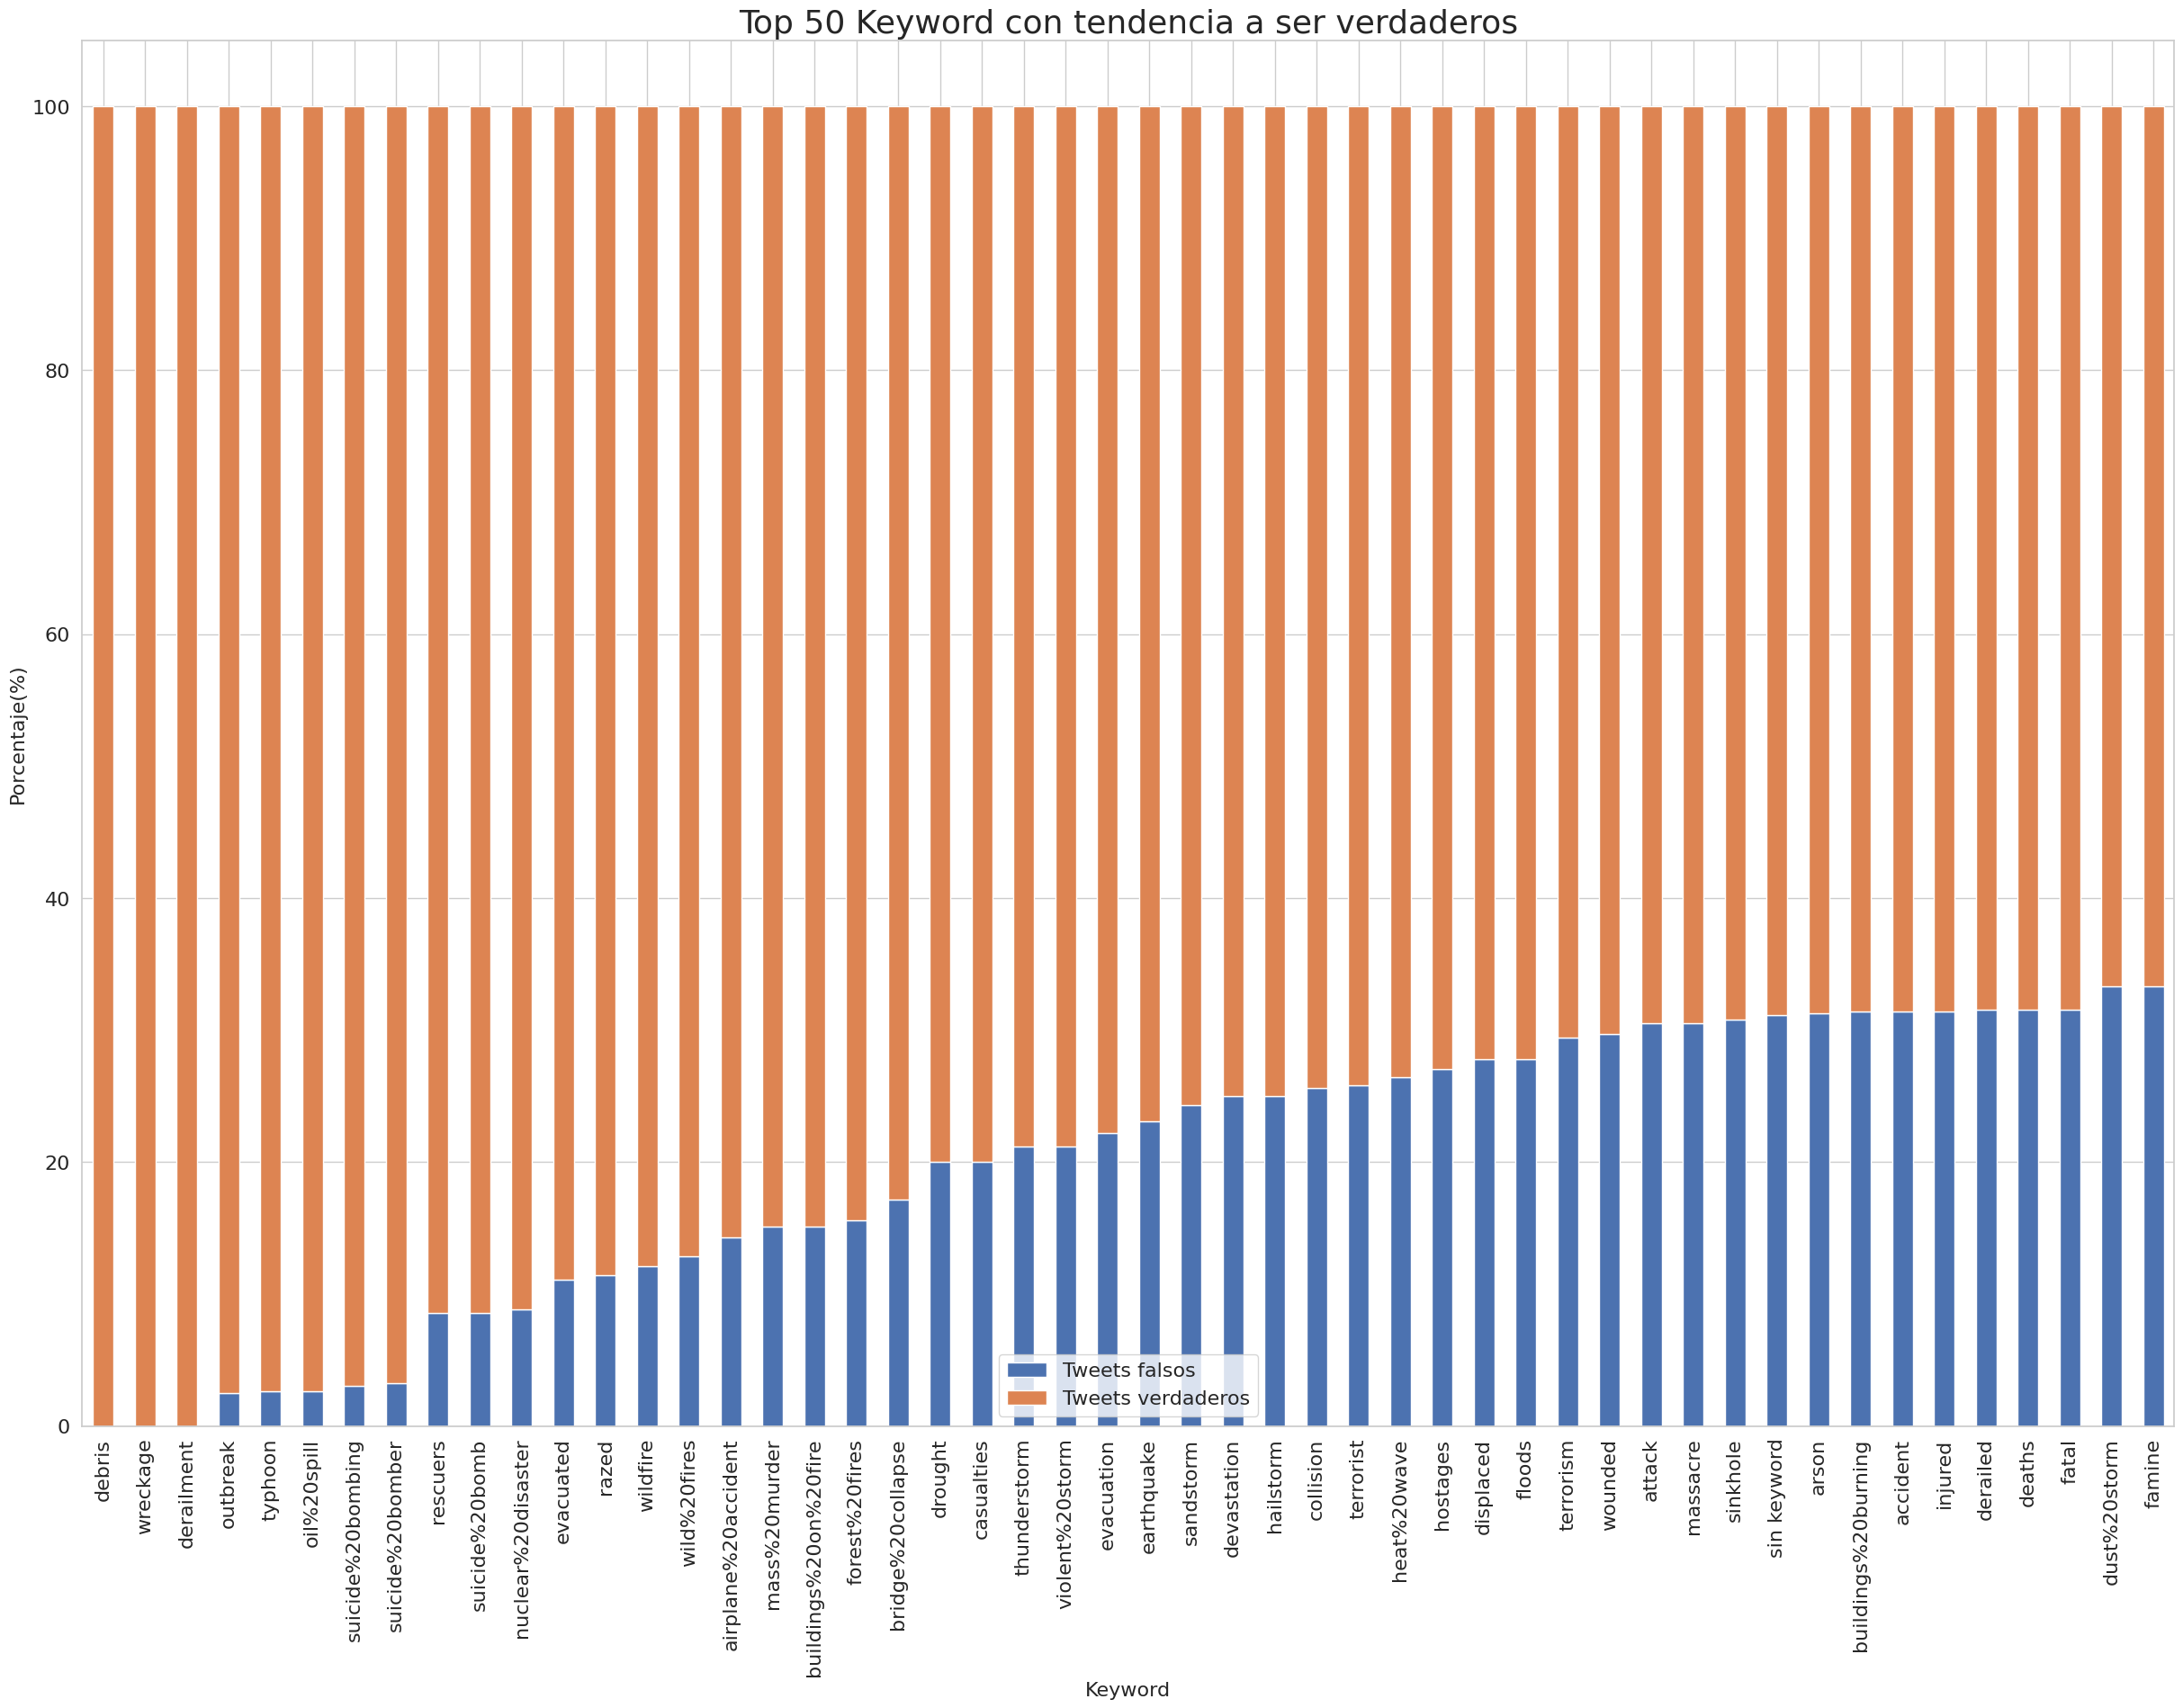

In [151]:
ax = top_verdaderos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser verdaderos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

Hay  tweets que contienen las primeras 3 keyword que son verdaderos en su totalidad. En el resto en general mantiene un porcentaje alto de veracidad. En general podemos notar que casi todas las palabras se refieren a eventos de gran repercusión como incendios, inundaciones, accidentes, desastres naturales, terrorismo,etc. Como detalle podemos apreciar que la keyword impuesta(‘sin keyword’) tiene un porcentaje de veracidad de aproximadamente el 70 por ciento.

En este segundo análisis buscaremos cuáles son las 50 keywords que más se usan en tweets falsos:

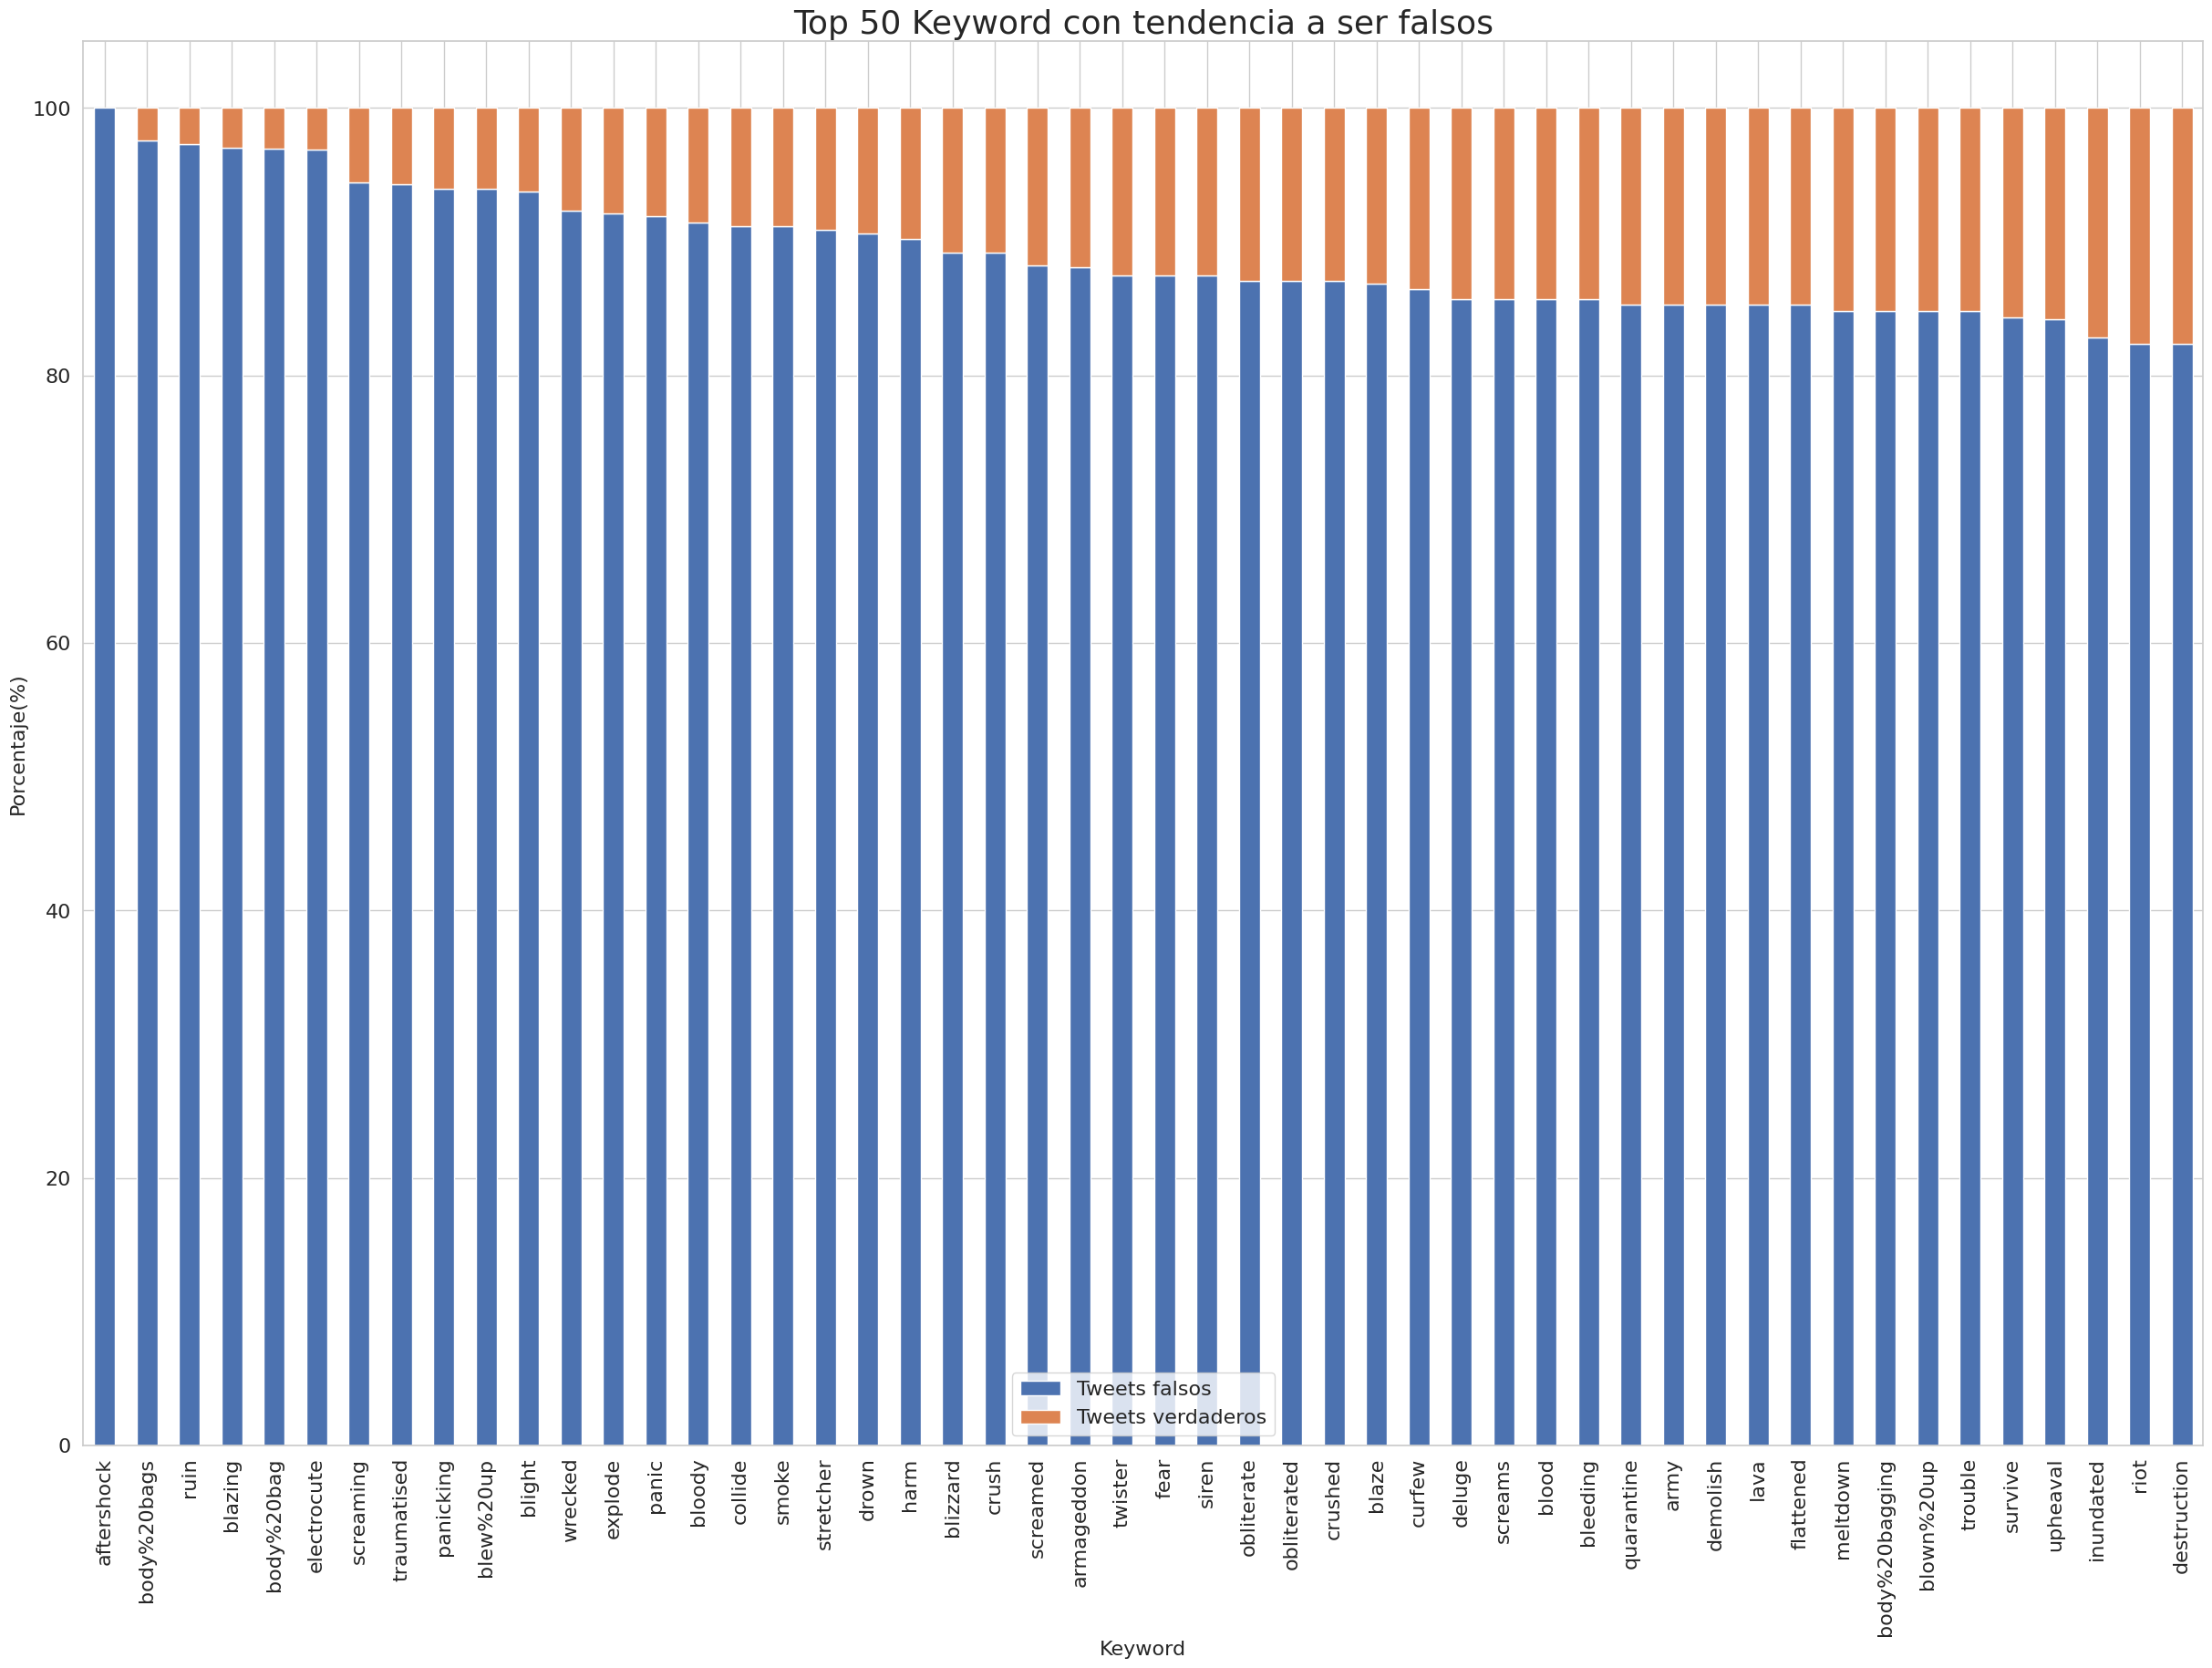

In [152]:
ax = top_falsos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser falsos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

Conclusión: En el primer análisis vemos que se utilizan palabras comúnmente por medios de comunicación tradicionales, es decir, diarios, canales de televisión o periodistas relacionados a estos. También pueden provenir de instituciones de rescate o asistencia(bomberos, ambulancias, etc). 
En el segundo se utilizan palabras con contenido explícito o violento con la aparente intención de llamar la atención.  Es  común el uso de  "miedo","pánico","sangriento" , “bolsas con cuerpos”, etc. Estos tweets parecen venir más de personas con intención de difundir información falsa, imprecisa o con ánimos de causar reacciones del lector.

# 4.3 Análisis del contenido de los tweets

## 4.3.1 Palabras más frecuentes

En esta sección nos fijaremos cuales son las palabras que más se repiten en los tweets, tantos verdaderos como en los falsos, lo que nos ayudará a poder identificar la veracidad de un tweet (entre otros datos) viendo las palabras que contienen.
Empezaremos viendo las 20 palabras más frecuentes en los tweets verdaderos.

In [153]:
#Funcion para dividir texto en lista de palabras
def split(txt, seps):
    default_sep = seps[0]
    for sep in seps[1:]:
        txt = txt.replace(sep, default_sep)
    return [i.strip() for i in txt.split(default_sep)]

#Funcion para contar palabras en listas y almacenar en un diccionario
def agregar(words_dict, new_words):
    for word in new_words:
        if word in words_dict:
            words_dict[word] += 1
        else:
            words_dict[word] = 1

In [154]:
verdaderos_words_dict = {}
tweets_verdaderos = df[df.target == 1]
tweets_verdaderos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(verdaderos_words_dict, x))
verdaderos_palabras = pd.DataFrame.from_dict(verdaderos_words_dict, orient='index')
verdaderos_palabras.sort_values(by=0, ascending=False).head(20).T

,,http://t,the,in,of,a,to,and,-,on,for,is,at,I,The,by,from,A,that,was
0,3610,2335,1060,1043,890,747,707,467,390,389,371,305,274,264,257,244,207,171,170,161


Como podría esperarse son en su mayoría artículos, pronombres, preposiciones, etc.
Probablemente estos también sean las palabras más frecuentes en tweets falsos. Si eliminamos de nuestro conjunto las palabras frecuentes que tengan en común lograremos filtrar la mayoría de estas palabras irrelevantes y además nos quedarán aquellas que son menos frecuentes en los tweets falsos.

In [155]:
tweets_falsos = df[df.target == 0]
falsos_words_dict = {}
tweets_falsos["text"].apply(lambda x: split(x, (',','.',' '))).apply(lambda x: agregar(falsos_words_dict, x))
falsos_palabras = pd.DataFrame.from_dict(falsos_words_dict, orient='index')
falsos_keys = falsos_palabras.sort_values(by=0, ascending=False).head(100).index
#Aún con el filtrado quedan algunas palabras irrelevantes. Las elimino manualmente 
irrelevantes_keys = ['over', 'were', 'than', 'More', 'S', 'This']
verdaderos_top_palabras = verdaderos_palabras.drop(labels=falsos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
verdaderos_top_palabras.columns = ['Tweets verdaderos']
verdaderos_top_palabras


,Tweets verdaderos
fire,123
California,94
killed,86
suicide,71
fires,70
Hiroshima,62
disaster,62
Northern,60
train,58
bomb,57


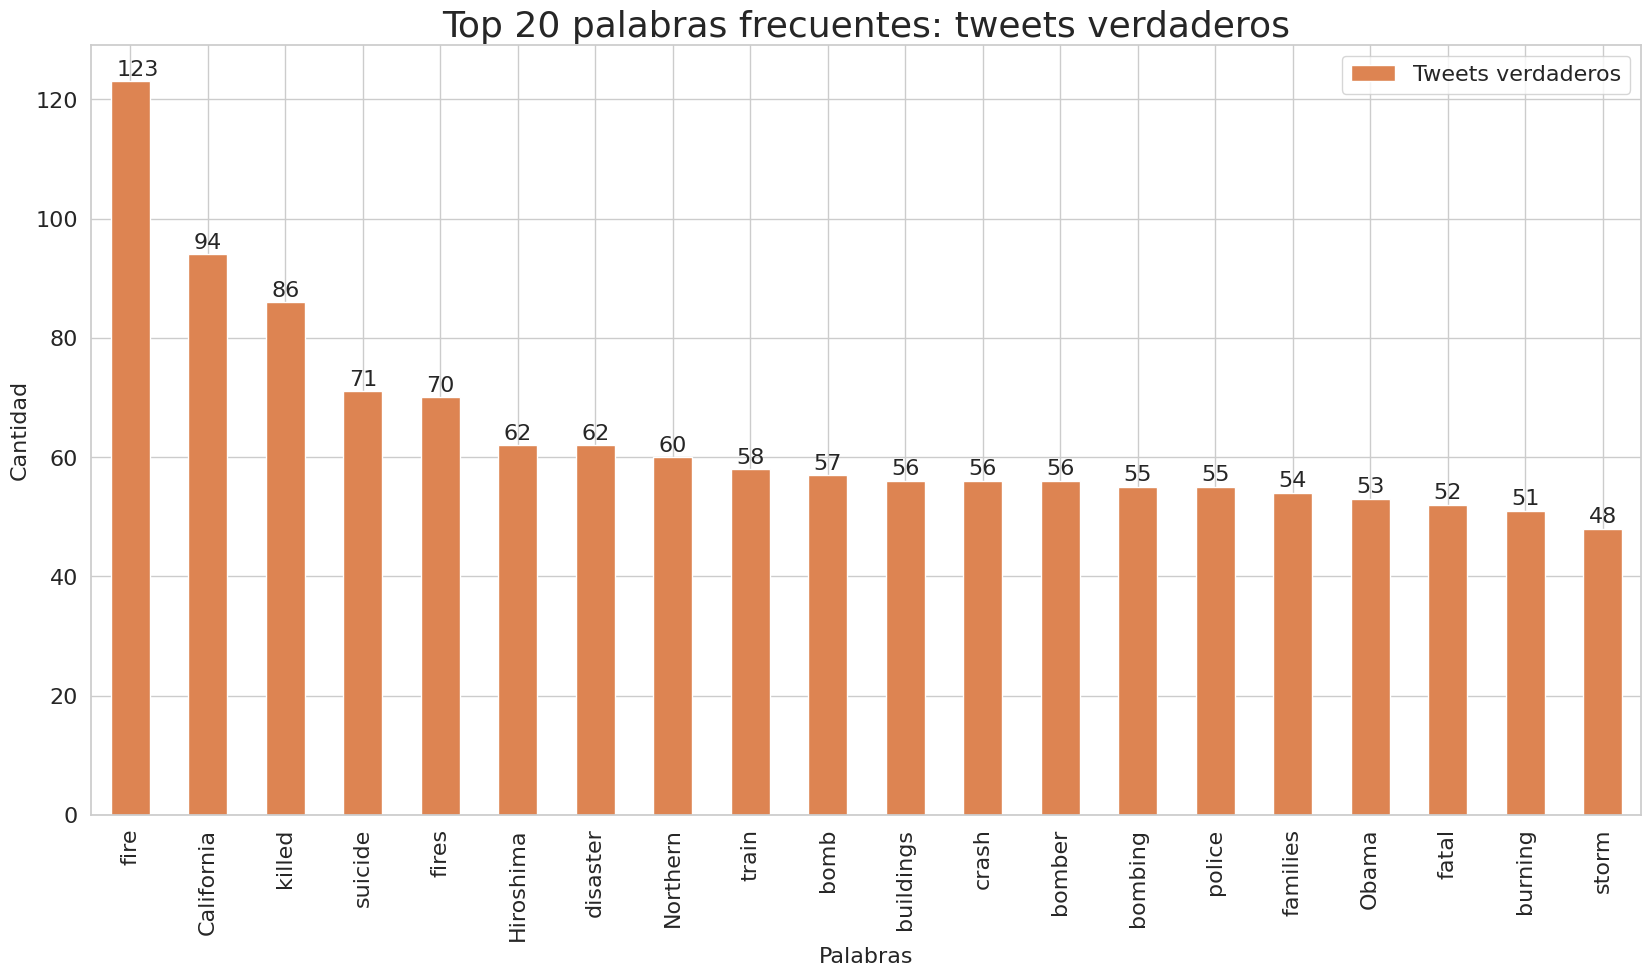

In [156]:
ax = verdaderos_top_palabras.plot(kind="bar", stacked=False, fontsize= 16, color='C1')
plt.title("Top 20 palabras frecuentes: tweets verdaderos", fontsize=26)
plt.xlabel("Palabras", fontsize= 16)
plt.ylabel("Cantidad", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(height, xy=(x+0.07, y + height + 1), fontsize=16)

Se puede ver que destacan términos vinculados a los distintos desastres: "fire", "fires" y "burning" relacionados a **incendios**, o "bomb", "bomber" y "bombing" relacionados a **bombas**. Por otro lado encontramos tambien términos particulares como "California", "Hiroshima" u "Obama" que presumimos deben estar vinculados a eventos específicos.
Ahora para obtener más informacion veamos qué porcentaje de los tweets que incluyen estas palabras son verdaderos o falsos.

/home/delpinor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/delpinor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/delpinor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/delpinor/anaconda3/lib/python

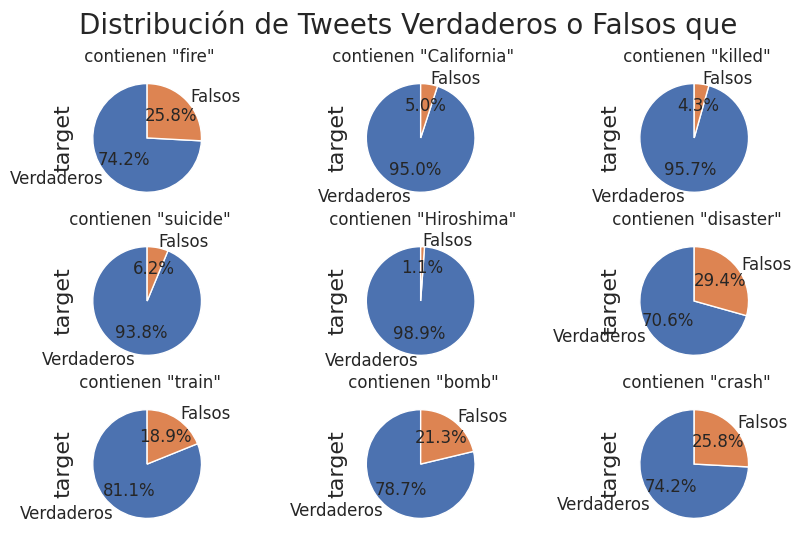

In [157]:
fig, axs = plt.subplots(3, 3)
fig.suptitle("Distribución de Tweets Verdaderos o Falsos que")
df.loc[df['text'].str.contains('fire'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "fire"', ax=axs[0][0])
df.loc[df['text'].str.contains('California'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "California"', ax=axs[0][1])
df.loc[df['text'].str.contains('killed'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "killed"', ax=axs[0][2])
df.loc[df['text'].str.contains('suicide'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "suicide"', ax=axs[1][0])
df.loc[df['text'].str.contains('Hiroshima'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "Hiroshima"', ax=axs[1][1])
df.loc[df['text'].str.contains('disaster'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "disaster"', ax=axs[1][2])
df.loc[df['text'].str.contains('train'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "train"', ax=axs[2][0])
df.loc[df['text'].str.contains('bomb'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "bomb"', ax=axs[2][1])
df.loc[df['text'].str.contains('crash'), 'target'].value_counts().plot.pie(labels=['Verdaderos', 'Falsos'], figsize = (10,6), startangle=90, autopct='%1.1f%%', title=' contienen "crash"', ax=axs[2][2])

Se puede apreciar que los terminos específicos tienen mayor indice de veracidad, seguidos por los relacionados a homicidios y por último los vinculados a accidentes.

Procedemos realizar lo mismo con los tweets falsos. Esta vez directamente filtraremos las palabras comunes.

In [193]:
#Debo quitar dos palabras de las keys a eliminar porque no aparecen en las palabras de los tweets falsos, lo que ocaciona error
verdaderos_keys = verdaderos_palabras.drop(['Northern', 'bomber']).sort_values(by=0, ascending=False).head(100).index
falsos_palabras.drop(labels=verdaderos_keys).sort_values(by=0, ascending=False).head(20)

,0
??,187
i,119
he,109
can,107
if,107
do,93
don't,88
her,87
new,86
his,86


In [196]:
irrelevantes_keys = ['can', 'i', 'there', 'know', 'THE', 'If' ,'if', 'he','do', 'don\'t', 'her', 'his', 'his', 'it\'s', 'would', 'now', 'what', 'You', 'My', 'how', 'got', '\'']
falsos_top_palabras = falsos_palabras.drop(labels=verdaderos_keys).drop(labels=irrelevantes_keys).sort_values(by=0, ascending=False).head(20)
falsos_top_palabras.columns = ['Tweets falsos']
falsos_top_palabras

,Tweets falsos
??,187
new,86
????,75
Full,69
New,69
see,68
video,68
going,67
time,66
body,66


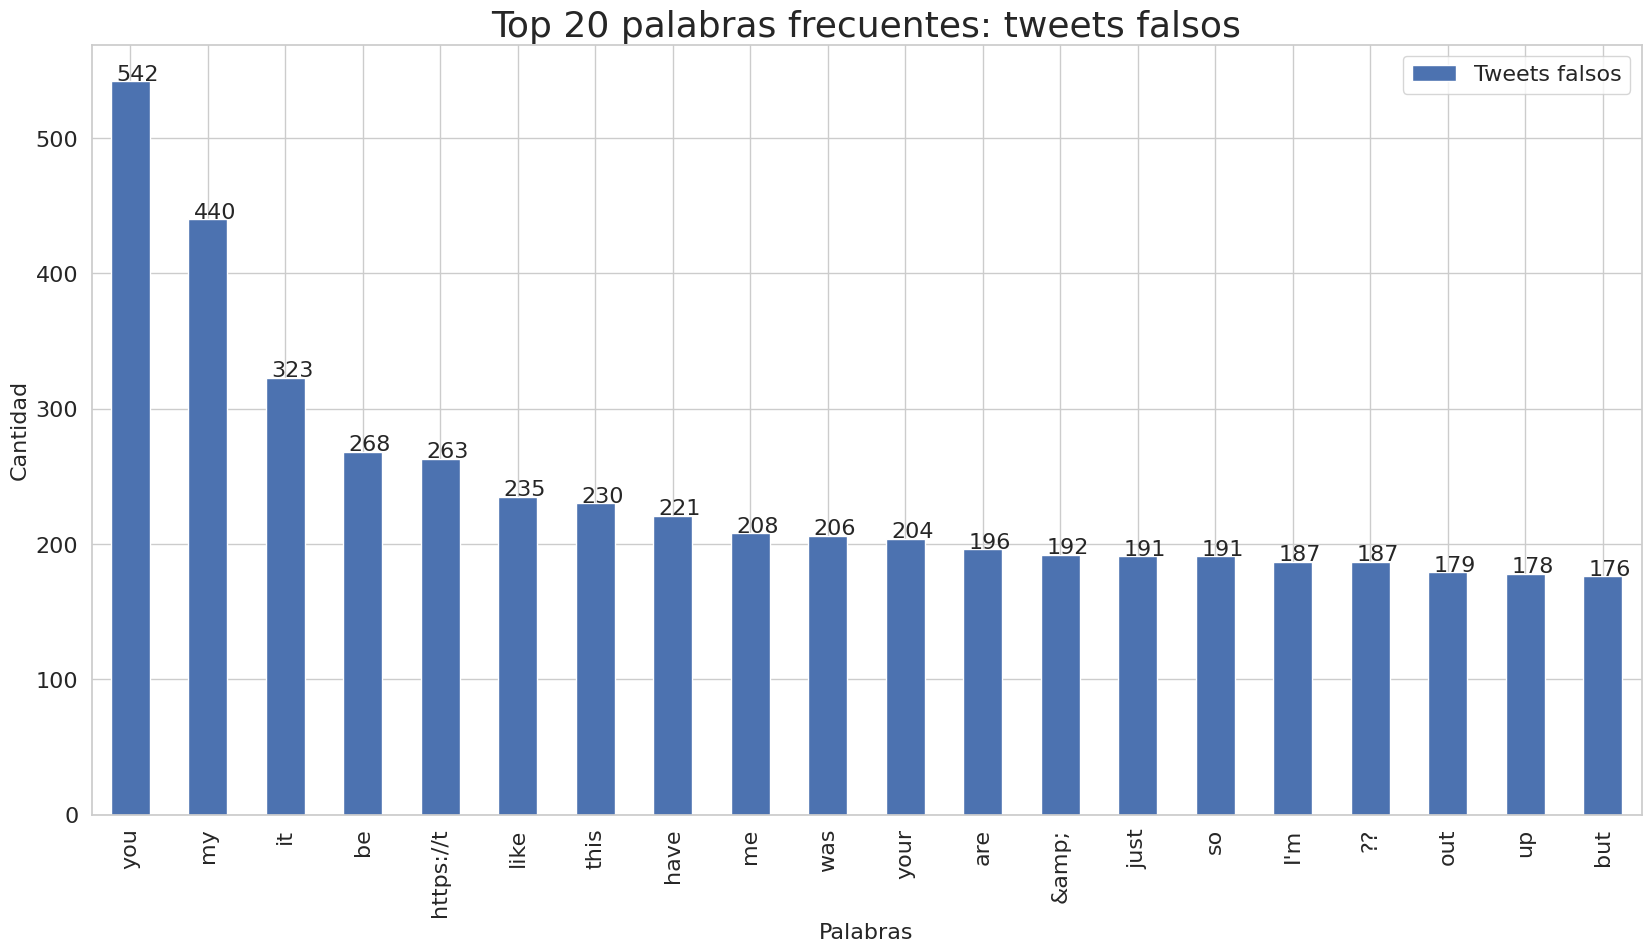

In [160]:
#falsos_top_palabras.head(20).plot(kind = 'barh', figsize = (20, 10), rot = 0, title = "Top palabras frecuentes en tweets verdaderos")
ax = falsos_top_palabras.plot(kind="bar", stacked=False, fontsize= 16, color='C0')
plt.title("Top 20 palabras frecuentes: tweets falsos", fontsize=26)
plt.xlabel("Palabras", fontsize= 16)
plt.ylabel("Cantidad", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(height, xy=(x+0.07, y + height + 1), fontsize=16)

Analicemos los datos que obtuvimos. Si bien escasean los términos llamativos, existe cierta relación entre palabras frecuentes. Por un lado están aquellas que indican posibilidad como "can", "if" y "would" (y de cierta forma "don't"), pudiendo referirse a posibles desastres que no ocurrieron. Están aquellas vinculadas a preguntas como "what", "how", "do" y los símbolos de interrogación, pudiendo de nuevo hacer referencia a desastres no ocurridos. Y en el top 2 y 3 nos quedan los pronombres personales "I" y "he". 

/home/delpinor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/delpinor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/delpinor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/delpinor/anaconda3/lib/python

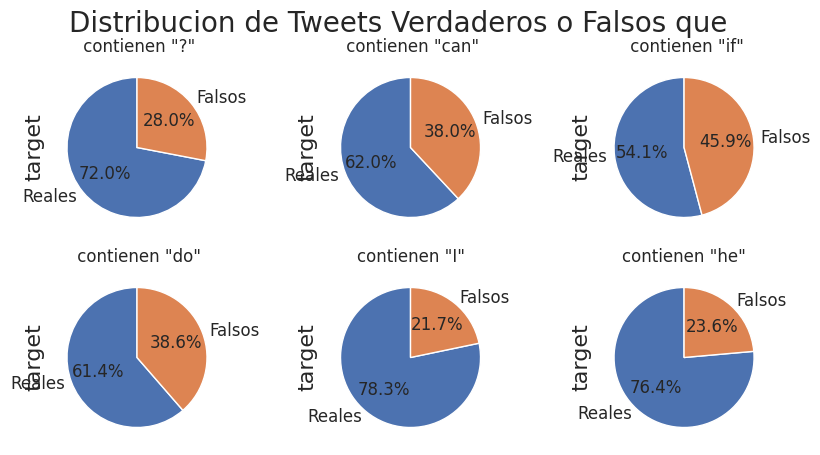

In [161]:
fig, axs = plt.subplots(2, 3)
fig.suptitle("Distribucion de Tweets Verdaderos o Falsos que")
df.loc[df['text'].str.contains('\?'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10,5), startangle=90, autopct='%1.1f%%', title=' contienen "?"', ax=axs[0][0])
df.loc[df['text'].str.contains('can'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10,5), startangle=90, autopct='%1.1f%%', title=' contienen "can"', ax=axs[0][1])
df.loc[df['text'].str.contains('if'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10,5), startangle=90, autopct='%1.1f%%', title=' contienen "if"', ax=axs[0][2])
df.loc[df['text'].str.contains('do'), 'target'].value_counts().plot.pie(labels=['Reales', 'Falsos'], figsize = (10,5), startangle=90, autopct='%1.1f%%', title=' contienen "do"', ax=axs[1][0])
contienen_I = df.loc[df['text'].str.contains(" I'") | df['text'].str.contains(' I '), 'target'].value_counts()
contienen_I.plot.pie(labels=['Reales', 'Falsos'], figsize = (10,5), startangle=90, autopct='%1.1f%%', title='contienen "I"', ax=axs[1][1])
contienen_he = df.loc[df['text'].str.contains(' He ', case=False) | df['text'].str.contains(" He'", case=False), 'target'].value_counts()
contienen_he.plot.pie(labels=['Reales', 'Falsos'], figsize = (10,5), startangle=90, autopct='%1.1f%%', title='contienen "he"', ax=axs[1][2])

## 4.3.2 Veracidad según los caracteres especiales

Ahora procederemos a analizar la veracidad de los tweets teniendo en cuenta algunos caracteres especiales que pueden tener, en este caso serán el arroba ('@'), el hashtag ('#'), si tiene un link ('http') o si no tiene ninguno de ellos. 
Se analizan estos caracteres especiales  debido a que presentan algunas características particulares:

hashtag(#): Se usa para convertir un tema en tendencia lo que hace que sea visible para muchos usuarios.

mencionado(@): En casos en lo que se desea compartir una noticia con seguidores o usuarios. También aparece cuando se retweet.

url(http): Cuando se hace referencia a una fuente(real o no) de la noticia.

Analizamos los tweets que contienen alguna de estas palabras, para eso creamos variables nuevas en nuestro DataFrame:



In [162]:
df_ext = df.copy()
df_ext['largo_del_texto'] = df_ext['text'].apply(len)
df_ext['mencion'] = df_ext['text'].str.contains('@').astype(int)
df_ext['hashtag'] = df_ext['text'].str.contains('#').astype(int)
df_ext['url'] = df_ext['text'].str.contains('http').astype(int)
df_ext['Sin caracteres especiales'] =  ((df_ext['text'].str.contains('@') == False) & \
(df_ext['text'].str.contains('#')  == False) & \
(df_ext['text'].str.contains('http') == False)).astype(int)
df_ext.tail(10)

,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin caracteres especiales
7603,10862,sin keyword,sin location,Officials say a quarantine is in place at an A...,1,136,0,0,1,0
7604,10863,sin keyword,sin location,#WorldNews Fallen powerlines on G:link tram: U...,1,136,0,1,1,0
7605,10864,sin keyword,sin location,on the flip side I'm at Walmart and there is a...,1,114,0,0,0,1
7606,10866,sin keyword,sin location,Suicide bomber kills 15 in Saudi security site...,1,121,0,0,1,0
7607,10867,sin keyword,sin location,#stormchase Violent Record Breaking EF-5 El Re...,1,134,0,1,1,0
7608,10869,sin keyword,sin location,Two giant cranes holding a bridge collapse int...,1,83,0,0,1,0
7609,10870,sin keyword,sin location,@aria_ahrary @TheTawniest The out of control w...,1,125,1,0,0,0
7610,10871,sin keyword,sin location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0,0,1,0
7611,10872,sin keyword,sin location,Police investigating after an e-bike collided ...,1,137,0,0,0,1
7612,10873,sin keyword,sin location,The Latest: More Homes Razed by Northern Calif...,1,94,0,0,1,0


In [163]:
tweets_red = df_ext[['target', 'mencion', 'hashtag', 'url', 'Sin caracteres especiales']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum', 'Sin caracteres especiales': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@user)', 'Contiene Hashtag(#)', 'Sin caracteres especiales']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
plotdata.T

,Contiene URL(http),Contiene mención(@user),Contiene Hashtag(#),Sin caracteres especiales
Tweets falsos,41.43,31.39,20.41,30.56
Tweets verdaderos,66.40,20.67,26.75,15.81


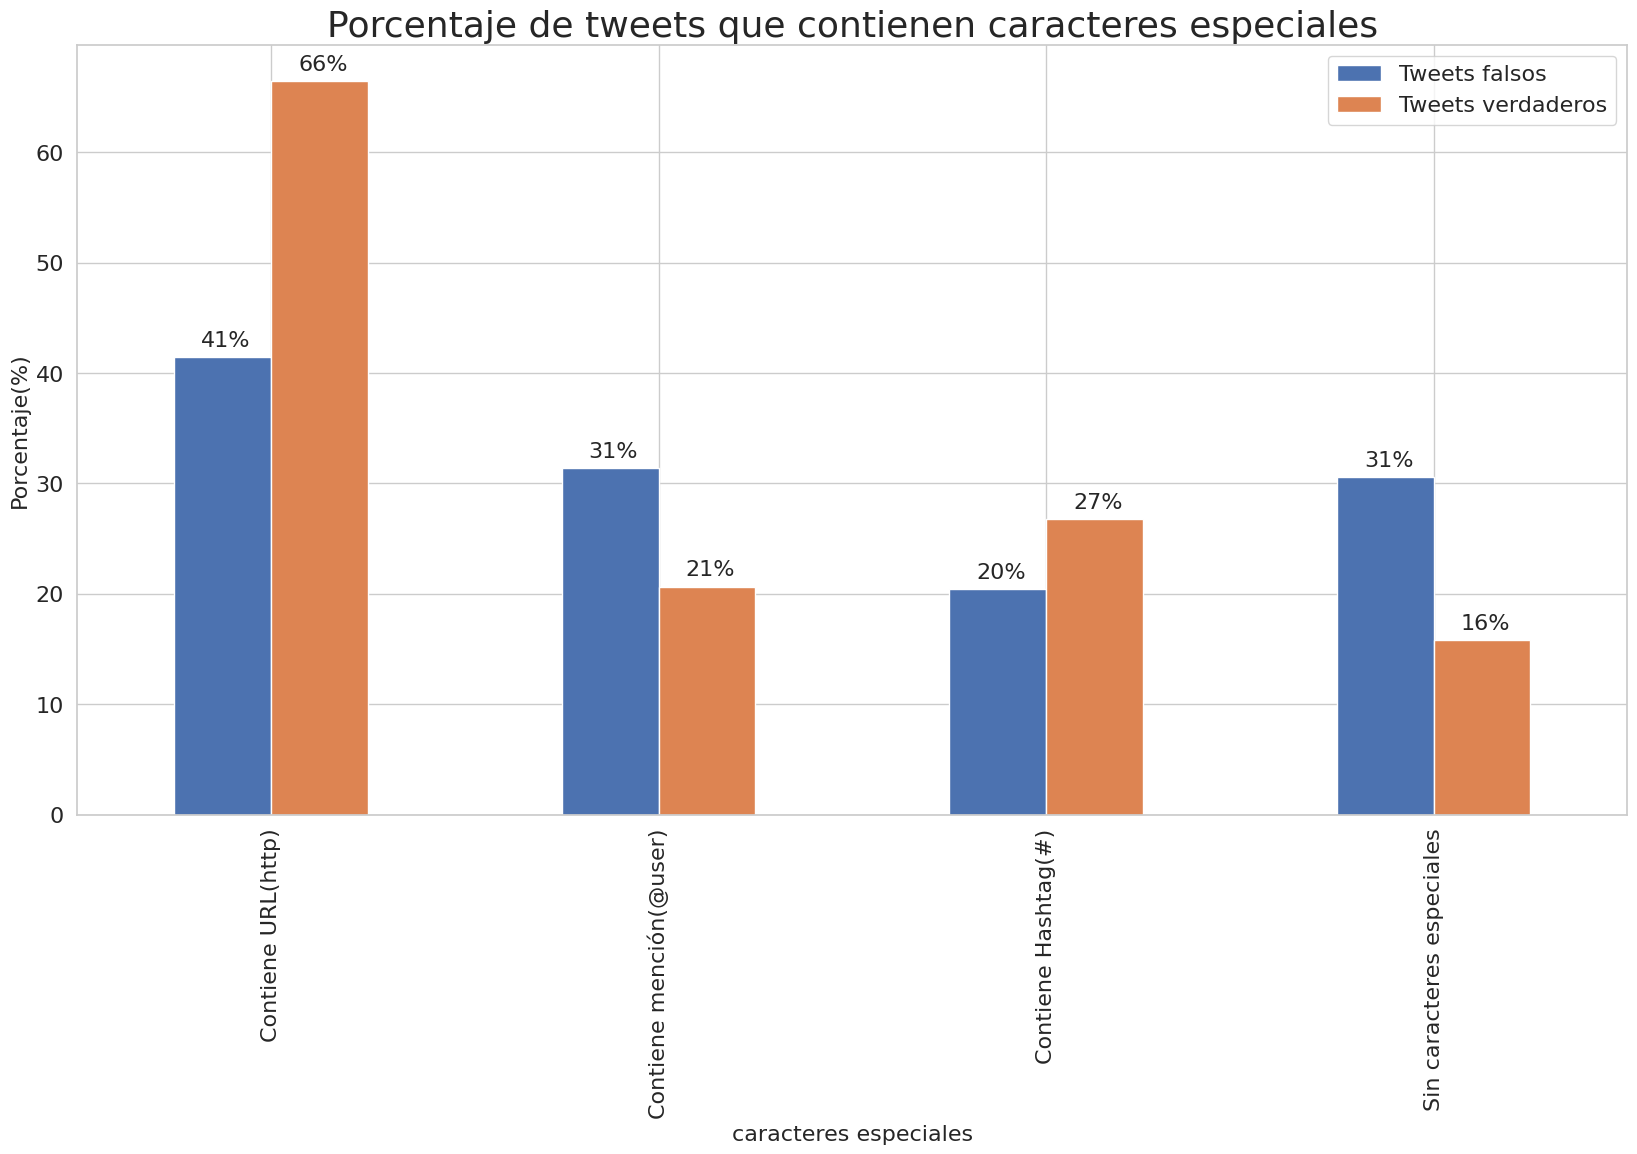

In [164]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Porcentaje de tweets que contienen caracteres especiales", fontsize=26)
plt.xlabel("caracteres especiales", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Conclusión :
El 66% de los tweets verdaderos que contienen un vínculo(http) hacia una fuente externa, esto se puede explicar debido a que una noticia puede ser contrastada con la referencia a que está asociada, es decir, que dichos vínculos, probablemente, estén relacionados a páginas web de diarios, canales de televisión, página gubernamental u otra fuente verificable. También es importante destacar dichos vínculos pueden estar relacionadas con ‘fake news’ o fuentes no confiables,  que luego de una verificación se corroboró la falsedad de la noticia .

Con respecto a la mención(@) no hay grandes diferencias porcentuales, lo que sí es apreciable que, a diferencia de los casos anteriores,  hay una mayor preponderancia de los tweets falsos, es decir el porcentaje de tweets falsos(que contienen @) es mayor que los verdaderos. Esta tendencia se puede explicar, en parte, por la necesidad de que los tweets falsos lleguen a una mayor cantidad de usuarios. Incluso estos pueden estar retuiteados por bots.
Habitualmente cuando se trata de instalar una noticia, se usa el hashtag(#) para resaltar una noticia o general una tendencia. En general las noticias que generan tendencia son verdaderas

A partir de este gráfico podemos afirmar que el 84% de los tweets reales contienen elementos hashtag(#), mención(@) y url(http) en su contenido y el 69% de los tweets falsos tienen los tres elementos.
En términos generales el 31%  de tweets  verdaderos contienen estos caracteres contra un 16% que no contienen. Analizando los gráficos podemos observar que hay una influencia de los tweets que contiene mención para atenuar la diferencia. Analizaremos la influencia solo de los tweets con url(http) y hashtag(#). Para ellos desplegamos el siguiente gráfico:

In [165]:
df_ext['Sin caracteres especiales'] = ((df_ext['text'].str.contains('#')  == False) & (df_ext['text'].str.contains('http') == False)).astype(int)
df_ext.head()


,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin caracteres especiales
0,1,sin keyword,sin location,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0,0
1,4,sin keyword,sin location,Forest fire near La Ronge Sask. Canada,1,38,0,0,0,1
2,5,sin keyword,sin location,All residents asked to 'shelter in place' are ...,1,133,0,0,0,1
3,6,sin keyword,sin location,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0,0
4,7,sin keyword,sin location,Just got sent this photo from Ruby #Alaska as ...,1,88,0,1,0,0


In [166]:
tweets_red = df_ext[['target', 'hashtag', 'url', 'Sin caracteres especiales']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'hashtag': 'sum', 'Sin caracteres especiales': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene Hashtag(#)', 'Sin caracteres especiales']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
plotdata

,Tweets falsos,Tweets verdaderos
Contiene URL(http),41.43,66.40
Contiene Hashtag(#),20.41,26.75
Sin caracteres especiales,51.06,26.78


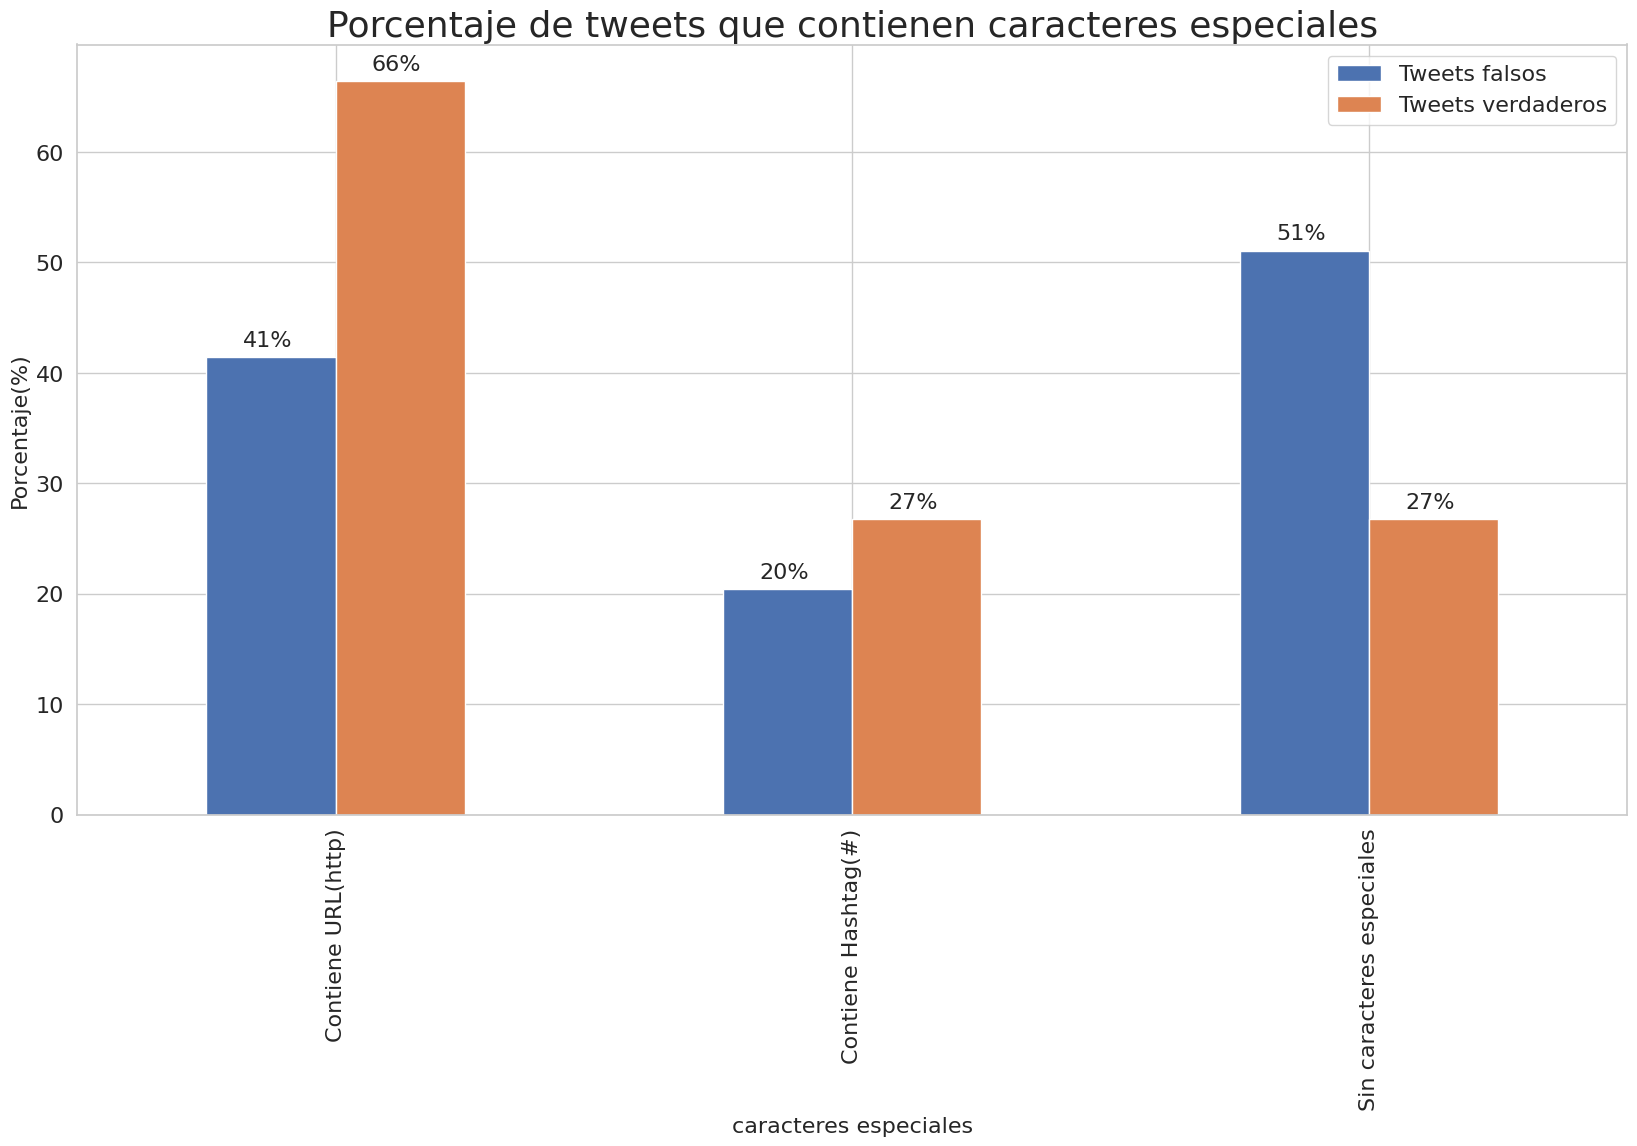

In [167]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Porcentaje de tweets que contienen caracteres especiales", fontsize=26)
plt.xlabel("caracteres especiales", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Si solo tuviéramos en cuenta los caracteres especiales url(http) y hashtag(#), podemos apreciar que el 51% de los tweets falsos no contienen estos. En el caso de los tweets verdaderos solo el 27% carecen de estos. 
Podemos afirmar que el 77% de los tweets reales contienen elementos hashtag(#) y url(http) en su contenido y el 49% de los tweets falsos tienen los dos caracteres.

## 4.3.3 Repetición de tweets

En el análisis de la Estructura de los Datos se pudo detectar que había al menos un tweet que se repite 10 veces. A partir de esto se profundizará su análisis y su relación y/o tendencia a ser verdadero o falso(de acuerdo al campo target).
Mostramos algunos tweets repetidos en la siguiente tabla:

(no es esa tabla, es otra)


In [168]:
grouped_target = df.groupby(["text", "target"])["target"].count().sort_values(ascending=False).to_frame()
grouped_target.columns = ['cantidad']
grouped_target = grouped_target.reset_index()
grouped_target = grouped_target[grouped_target['cantidad'] > 1] # Tweets con repetición mayor a 1
grouped_target = grouped_target.groupby('target').agg({'cantidad': 'sum'})
falsos_count = grouped_target.iloc[0]
verdaderos_count = grouped_target.iloc[1]
grouped_target.reset_index()

,target,cantidad
0,0,47
1,1,110


¿ Los tweets repetidos, tienen una tendencia a ser falsos? 
Realizando un conteo de la cantidad de tweets repetidos tanto para los tweets verdaderos como falsos y realizamos la siguiente visualización:

/home/delpinor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


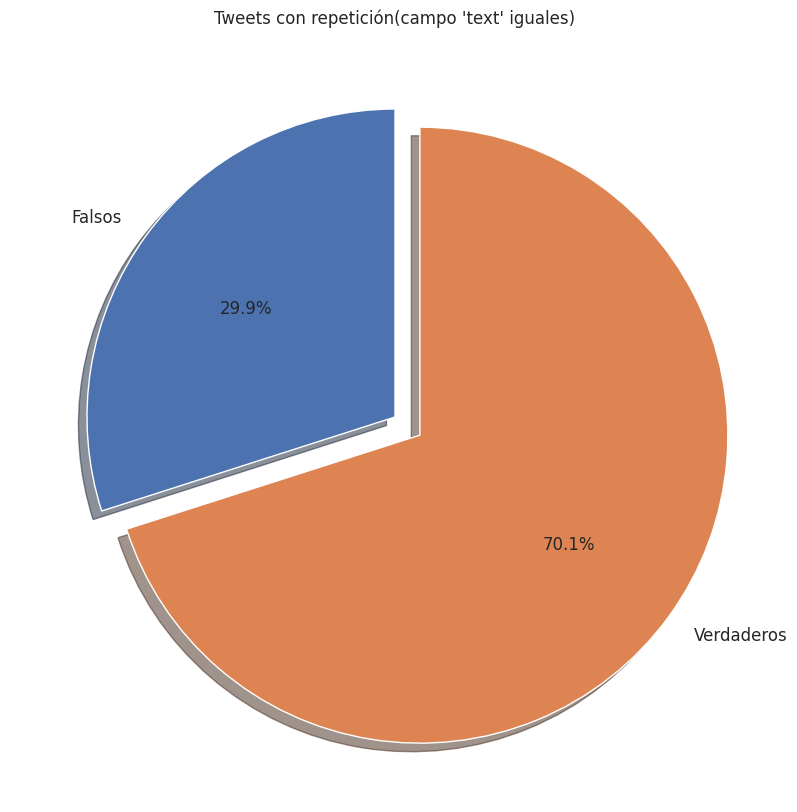

In [169]:
fig, ax = plt.subplots()
ax.pie([falsos_count, verdaderos_count], explode=(0, 0.1), labels=['Falsos', 'Verdaderos'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Tweets con repetición(campo 'text' iguales)")
plt.show()

Para nuestra sorpresa, había una suposición que en su mayoría eran falsos, más del 70% de los tweets con mismo contenido son verdaderos.  Es probable que esto se deba a que estos son retuits y en general estos son de noticias verdaderas.

## 4.4 Análisis de localizaciones

En esta sección analizaremos las localizaciones desde donde producen los eventos y su relación con los targets. A continuación mostramos tres tablas(General, verdaderos y falsos) de las 20 Ciudades donde se producen la mayoría de estos eventos. Ordenados de mayor a menor(%).


In [170]:
n = 20 # Top n ciudades
grouped_by_location = df[df['location'] != 'sin location'].groupby(['location', 'target']).agg({'target': 'count'})
grouped_by_location = grouped_by_location.unstack(level=1)
grouped_by_location = grouped_by_location.reset_index()
grouped_by_location = grouped_by_location.droplevel(0, axis=1)
grouped_by_location[[0, 1]] = grouped_by_location[[0,1]].fillna(value=0)
grouped_by_location['General'] = grouped_by_location[0]+grouped_by_location[1]
grouped_by_location.columns=['Lugar', 'Falsos', 'Verdaderos', 'General']
top_n_general = grouped_by_location[['Lugar', 'General']].sort_values('General', ascending=False).head(n).iloc[::-1]
top_n_verdaderos = grouped_by_location[['Lugar', 'Verdaderos']].sort_values('Verdaderos', ascending=False).head(n).iloc[::-1]
top_n_falsos = grouped_by_location[['Lugar', 'Falsos']].sort_values('Falsos', ascending=False).head(n).iloc[::-1]
top_n_general.T

,2249,577,1837,934,574,368,654,2868,1373,2778,1719,1262,1534,2632,1860,587,1506,2662,1826,2643
Lugar,San Francisco,"California, USA","New York, NY",Everywhere,California,Australia,"Chicago, IL",Worldwide,Kenya,"Washington, DC",Mumbai,India,"Los Angeles, CA",UK,Nigeria,Canada,London,United States,New York,USA
General,14.00,15.00,15.00,15.00,17.00,18.00,18.00,19.00,20.00,21.00,22.00,24.00,26.00,27.00,28.00,29.00,45.00,50.00,71.00,104.00


In [171]:
top_n_verdaderos.T

,2228,1530,852,577,1534,1266,368,2775,654,2868,587,2778,2632,1506,1826,1719,1262,1860,2662,2643
Lugar,"Sacramento, CA",Los Angeles,Earth,"California, USA","Los Angeles, CA",Indonesia,Australia,"Washington, D.C.","Chicago, IL",Worldwide,Canada,"Washington, DC",UK,London,New York,Mumbai,India,Nigeria,United States,USA
Verdaderos,7.00,7.00,8.00,8.00,8.00,8.00,9.00,9.00,9.00,12.00,13.00,15.00,16.00,16.00,16.00,19.00,20.00,22.00,27.00,67.00


In [172]:
top_n_falsos.T

,1837,2249,1511,3222,114,654,368,574,2660,1759,959,2632,934,1373,587,1534,2662,1506,2643,1826
Lugar,"New York, NY",San Francisco,"London, England",ss,304,"Chicago, IL",Australia,California,United Kingdom,NYC,Florida,UK,Everywhere,Kenya,Canada,"Los Angeles, CA",United States,London,USA,New York
Falsos,8.00,8.00,9.00,9.00,9.00,9.00,9.00,10.00,10.00,10.00,11.00,11.00,12.00,15.00,16.00,18.00,23.00,29.00,37.00,55.00


Para realizar los gráficos no se tendrá en cuenta el valor ‘sin location’ debido a que representa un valor muy grande(del orden de 20 veces) comparado con el siguiente valor de las tablas, por lo que se supone que distorsionara la visualización.

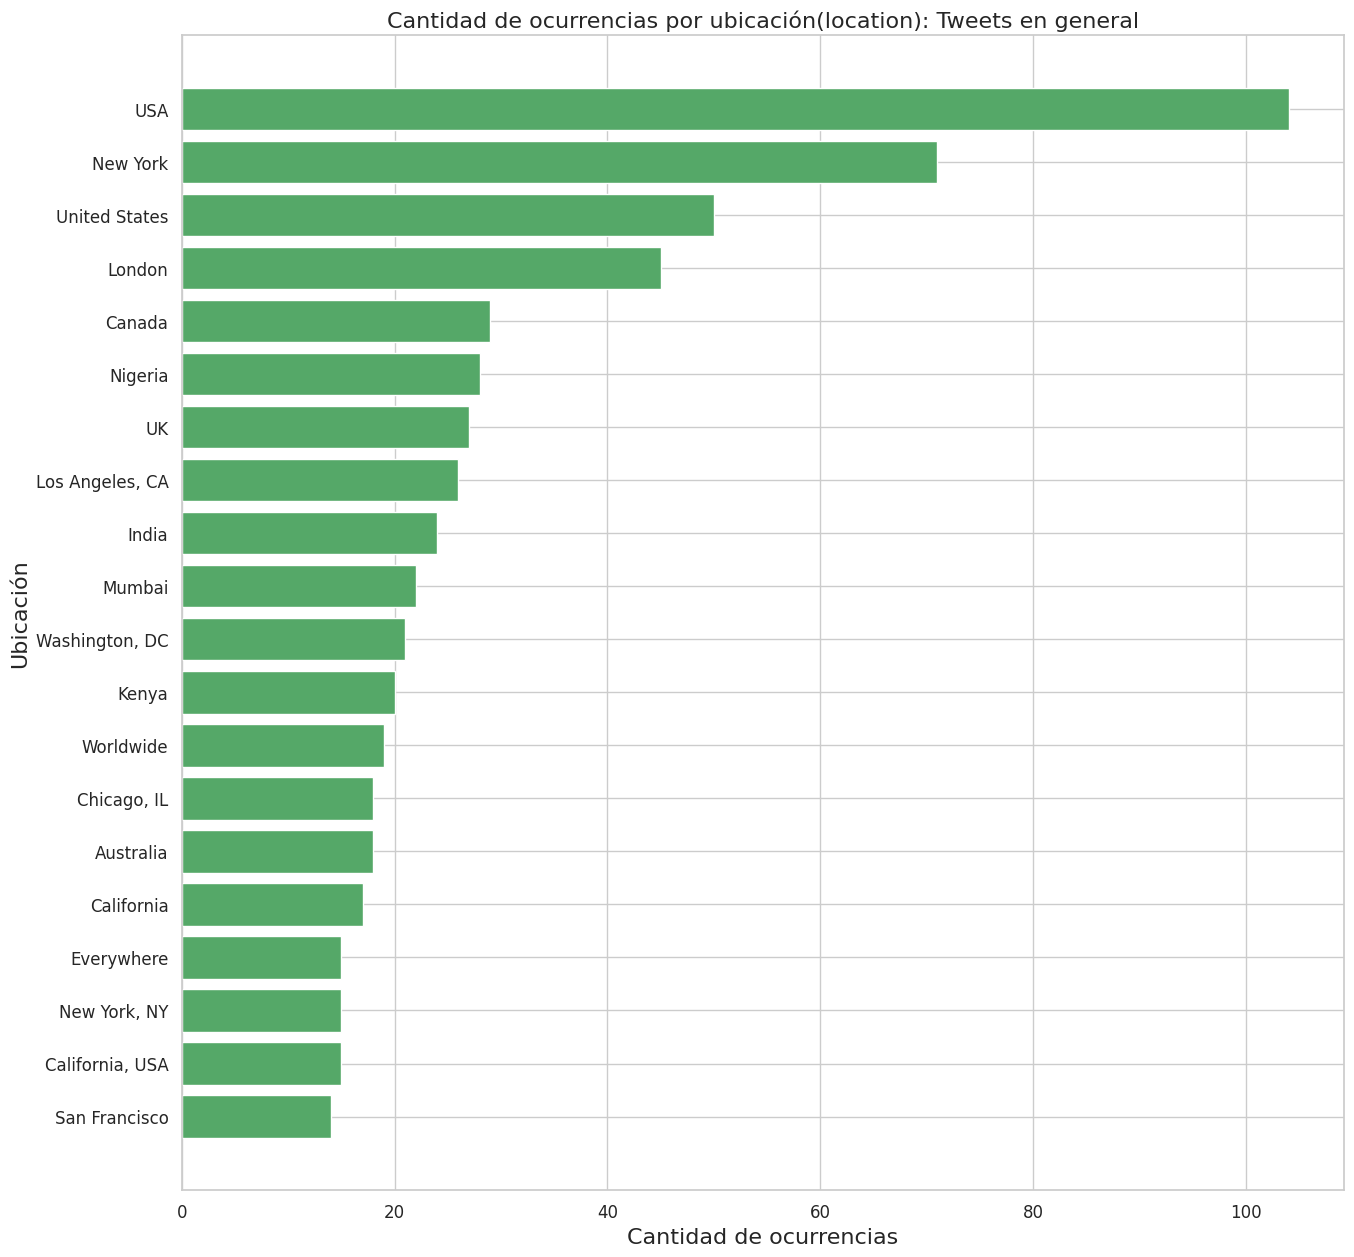

In [173]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets en general', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_general.Lugar, width=top_n_general.General, color='C2')

plt.show()

El 58.7% por ciento de los eventos sucede en los Estados Unidos. Mayormente en Nueva York aunque USA lo puede incluir. No podemos determinar.

El 12% sucede en London/UK.

Canadá 4.8%

Nigeria 4.7%


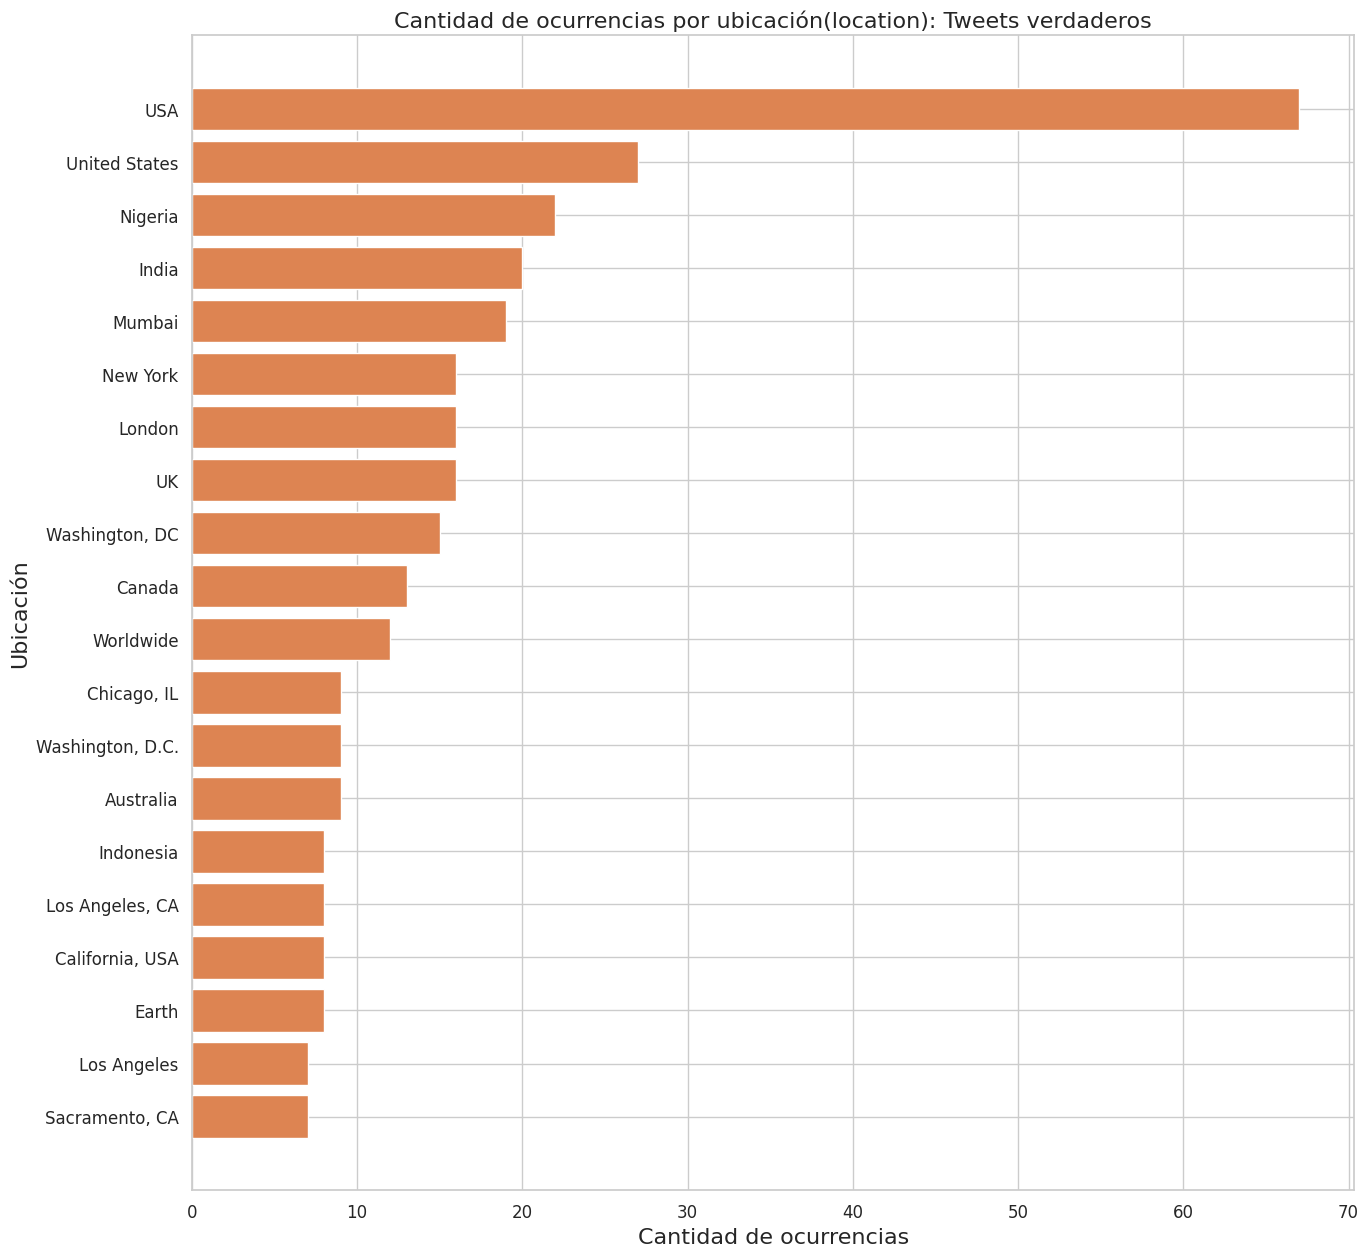

In [174]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets verdaderos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')
plt.barh(y=top_n_verdaderos.Lugar, width=top_n_verdaderos.Verdaderos, color='C1')

plt.show()

El 51.9% por ciento de los eventos sucede en los Estados Unidos. No focalizados en alguna ciudad.

Nigeria 6.96%

India 6.33%

Nigeria 4.7%

Mumbai 6.01%

London 5.06%


UK 5.06%


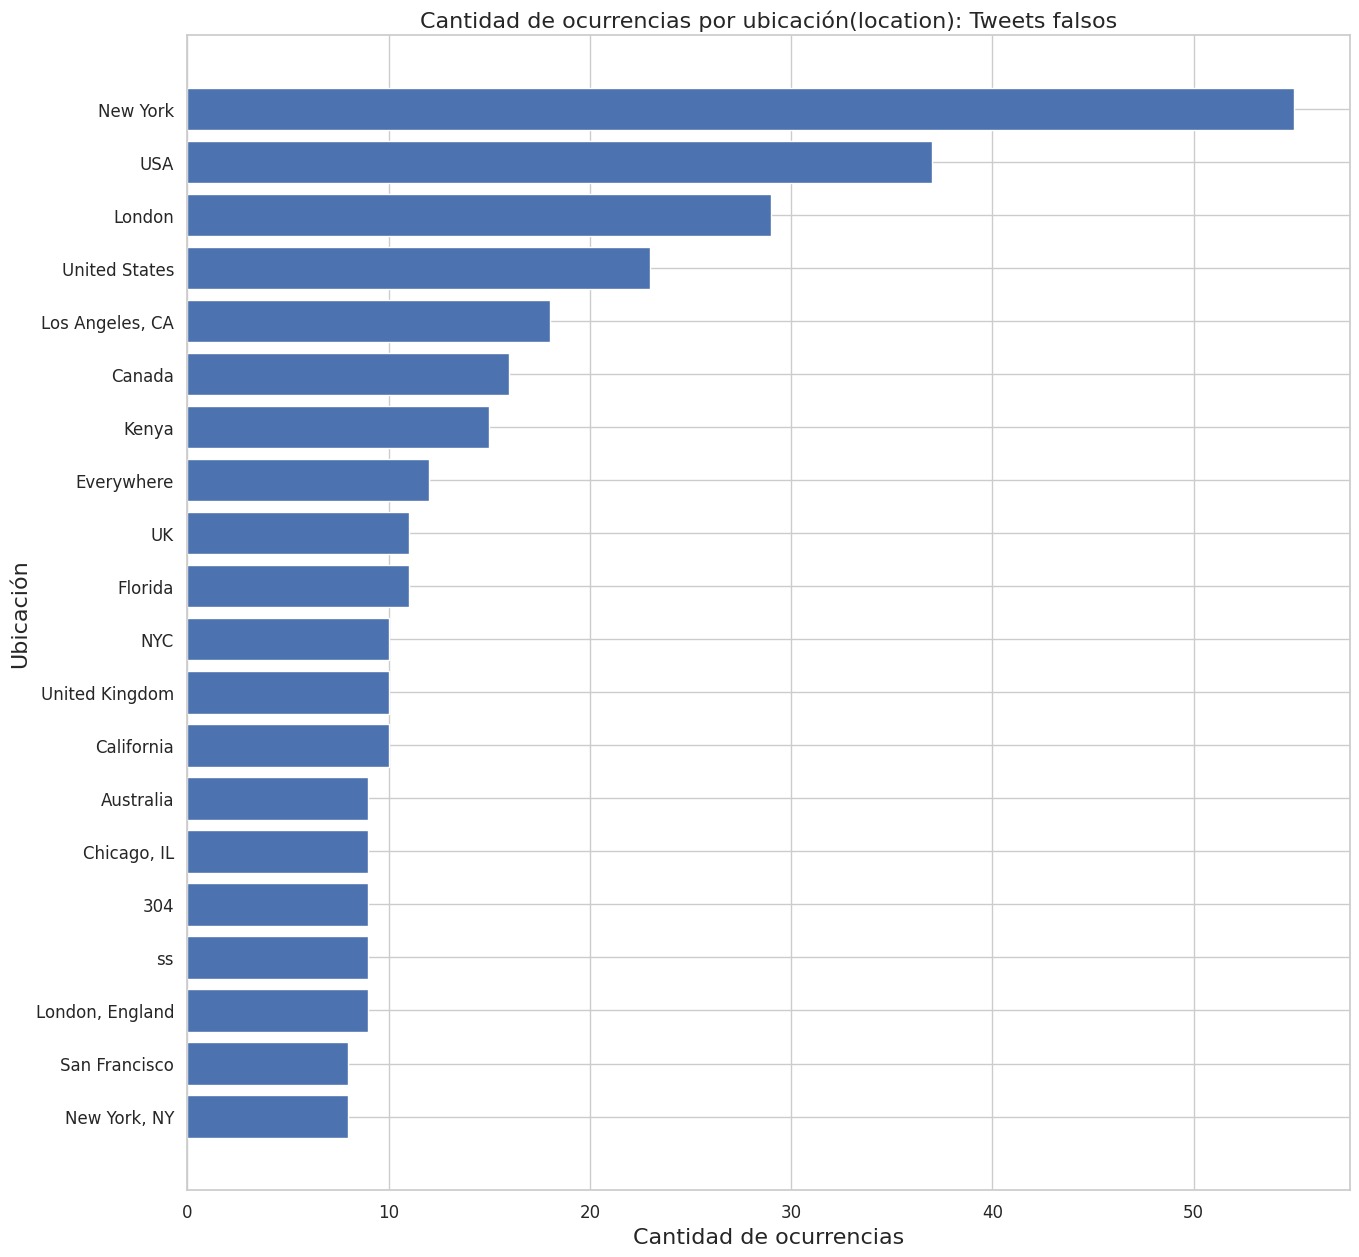

In [175]:
# Tamaño
plt.figure(figsize=(15,15))
# Título
plt.title('Cantidad de ocurrencias por ubicación(location): Tweets falsos', fontsize=16)
# Eje X
plt.xlabel('Cantidad de ocurrencias')
# Eje Y
plt.ylabel('Ubicación')

plt.barh(y=top_n_falsos.Lugar, width=top_n_falsos.Falsos, color='C0')

plt.show()

El 59.4% por ciento de los eventos sucede en los Estados Unidos. Focalizados en New York y Los Ángeles.

London 9.12%

Canadá 5.03%

Kenya 4.72%

Conclusión:
Si bien no tenemos información que  marque una tendencia o un patrón fácil de detectar, es interesante mencionar que para el caso de los tweets verdaderos no tienen lugar en Ciudades particulares sino en Estados Unidos y  países como Nigeria, India y Mumbai.
Para los casos de tweets falsos, hay un incremento leve de eventos que suceden dentro de Estados Unidos(la mayoría) y en general focalizados Ciudades(New York, London y Los Ángeles).


## Para 'sin location'

In [176]:
df_ver_loc = tweets_reales[tweets_reales['location'] == 'sin location'].groupby(['location'])['target'].agg(['size'])
df_ver_loc.columns = ['tweets_verdaderos']

df_falsos_loc = tweets_falsos[tweets_falsos['location'] == 'sin location'].groupby(['location'])['target'].agg(['size'])
df_falsos_loc.columns = ['tweets_falsos']

df_location = pd.merge(df_falsos_loc, df_ver_loc, on='location', how='outer')
df_location['tweets_verdaderos'].fillna(0, inplace=True)
df_location['tweets_falsos'].fillna(0, inplace=True)
df_location = df_location.loc[(df_location.tweets_falsos >10) | (df_location.tweets_verdaderos > 10)] 
df_location.sort_index()


,tweets_falsos,tweets_verdaderos
location,,
sin location,1458,1075


## Tweets falsos o verdaderos por location

In [177]:
variable = 10
df_ver_loc = tweets_reales[tweets_reales['location'] != 'sin location'].groupby(['location'])['target'].agg(['size'])
df_ver_loc.columns = ['tweets_verdaderos']

df_falsos_loc = tweets_falsos[tweets_falsos['location'] != 'sin location'].groupby(['location'])['target'].agg(['size'])
df_falsos_loc.columns = ['tweets_falsos']

df_location = pd.merge(df_falsos_loc, df_ver_loc, on='location', how='outer')
df_location['tweets_verdaderos'].fillna(0, inplace=True)
df_location['tweets_falsos'].fillna(0, inplace=True)
df_location = df_location.loc[(df_location.tweets_falsos >variable) | (df_location.tweets_verdaderos > variable)] 
df_location.sort_index()

,tweets_falsos,tweets_verdaderos
location,,
Canada,16.00,13.00
Everywhere,12.00,3.00
Florida,11.00,3.00
India,4.00,20.00
Kenya,15.00,5.00
London,29.00,16.00
"Los Angeles, CA",18.00,8.00
Mumbai,3.00,19.00
New York,55.00,16.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

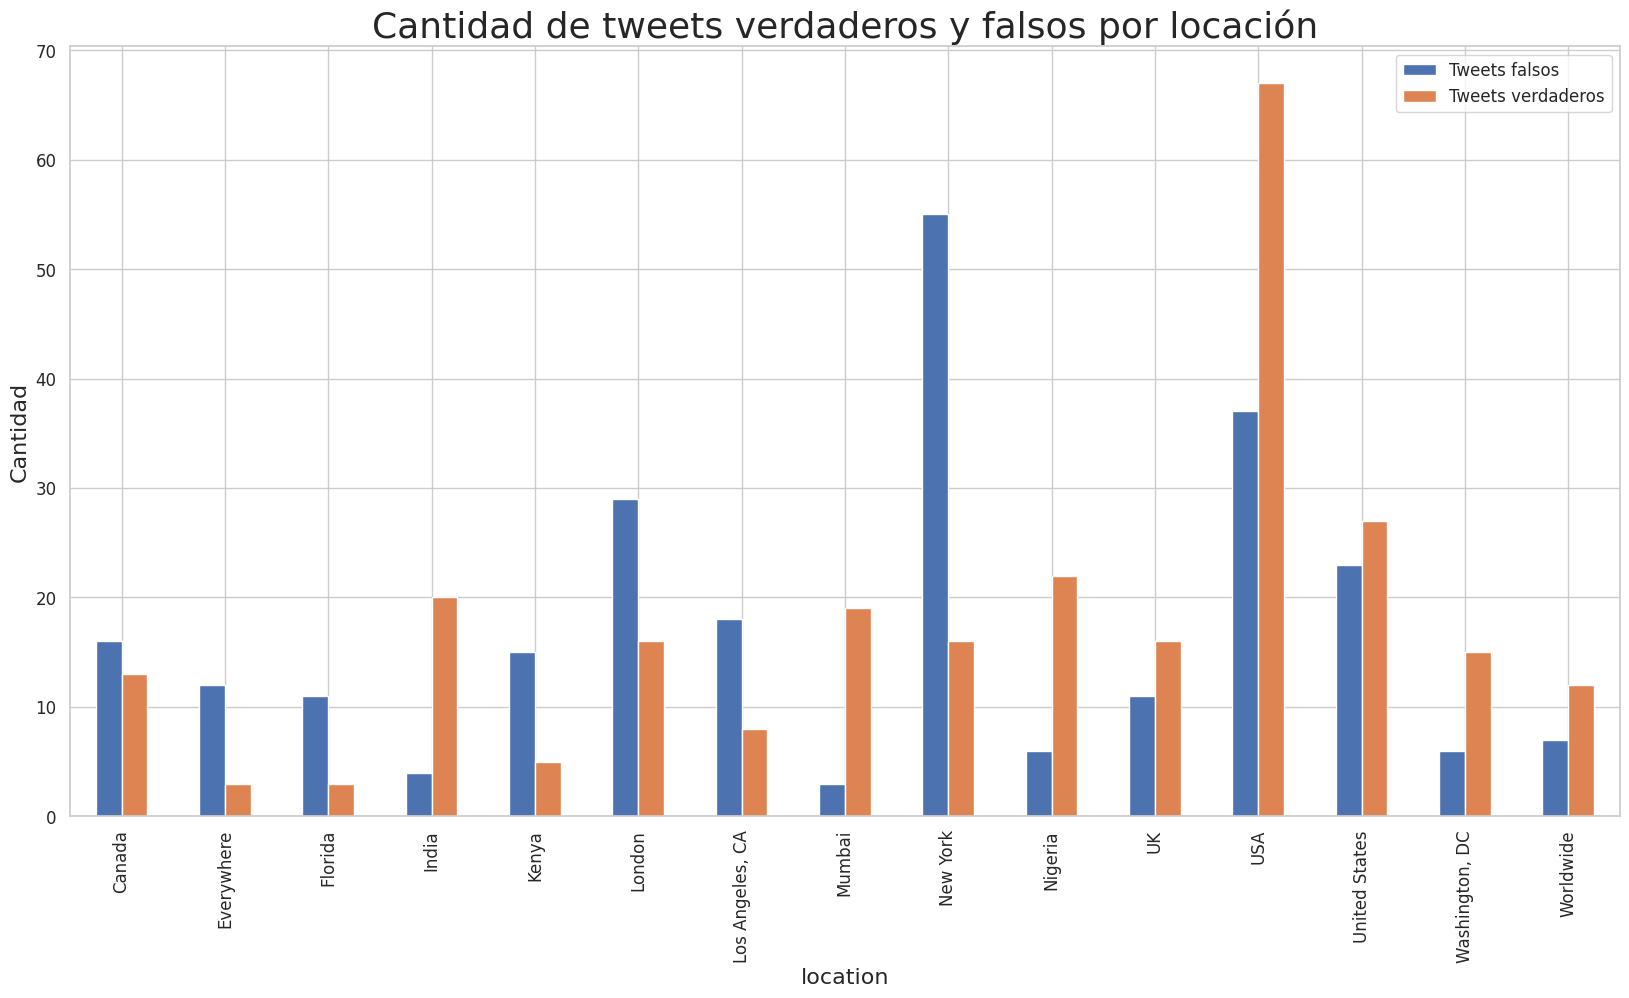

In [213]:
df_location.columns = ['Tweets falsos', 'Tweets verdaderos']
df_location.plot(kind = 'bar', figsize = (20, 10), rot = 0)
plt.title("Cantidad de tweets verdaderos y falsos por locación", fontsize=26)
plt.ylabel('Cantidad')
plt.xticks(rotation='vertical')


Se observa que "Nueva York" tiene una alta concentración de tweets falsos mientras que "USA" tiene casi mayoria de tweets verdaderos. Mumbai e India, si bien no tienen tantos tweets como los anteriores, tienen una mayoria de tweets verdaderos. (continuar)
Obviamos el hecho de que Nueva York queda en USA ya que no unimos a ninguna ciudad o estado con su país.

## 4.5 Relación entre el largo del texto y el target

Ahora veremos qué relación hay entre la longitud del tweet y su veracidad.
Primero analizaremos la longitud sola para tener una idea general y luego lo uniremos con el target.

Text(0, 0.5, 'Cantidad')

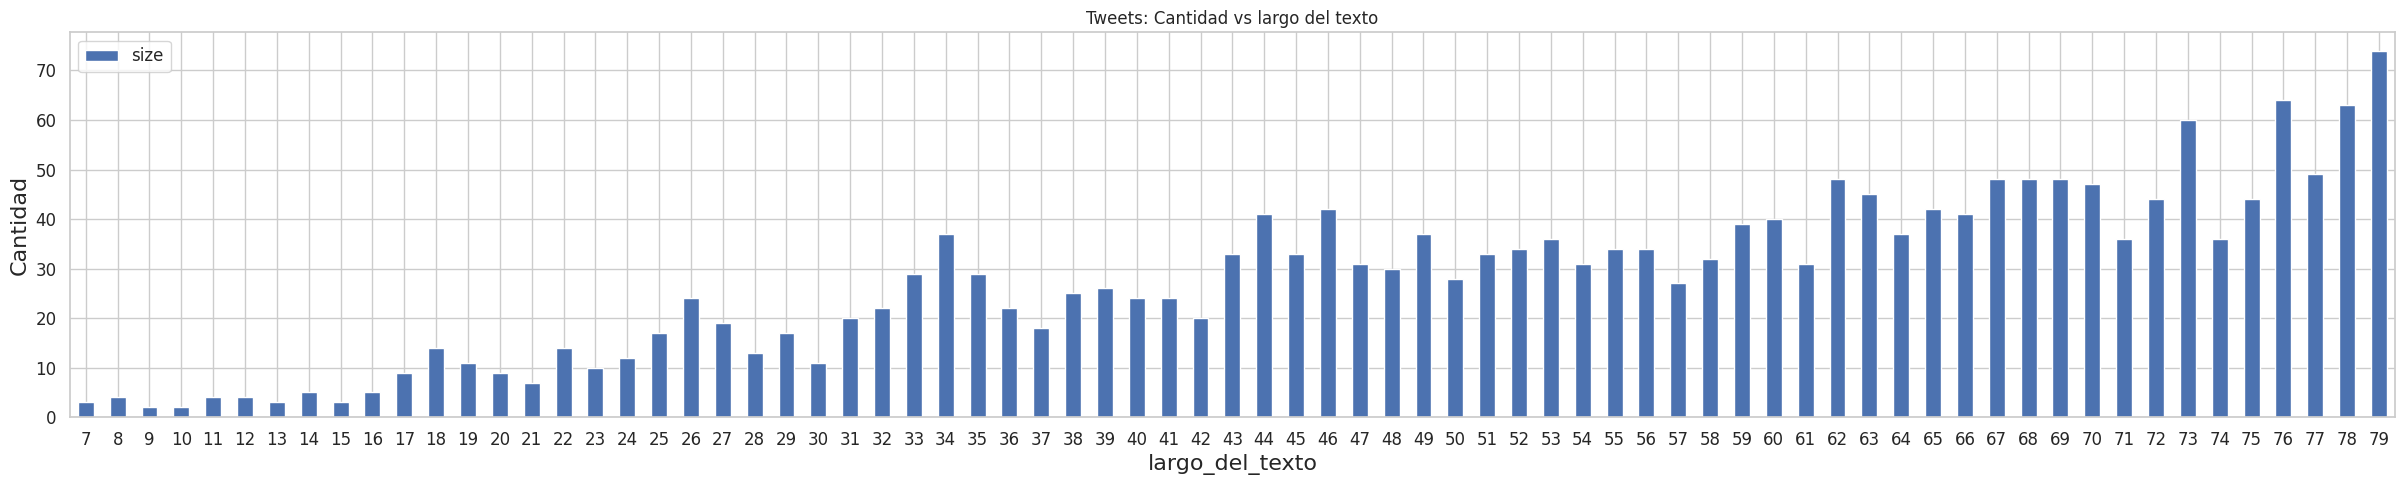

In [200]:
cantidad_de_tweets1 = df_ext.loc[(df_ext.largo_del_texto < 80)]
cantidad_de_tweets1 = cantidad_de_tweets1.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets1.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Tweets: Cantidad vs largo del texto")
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

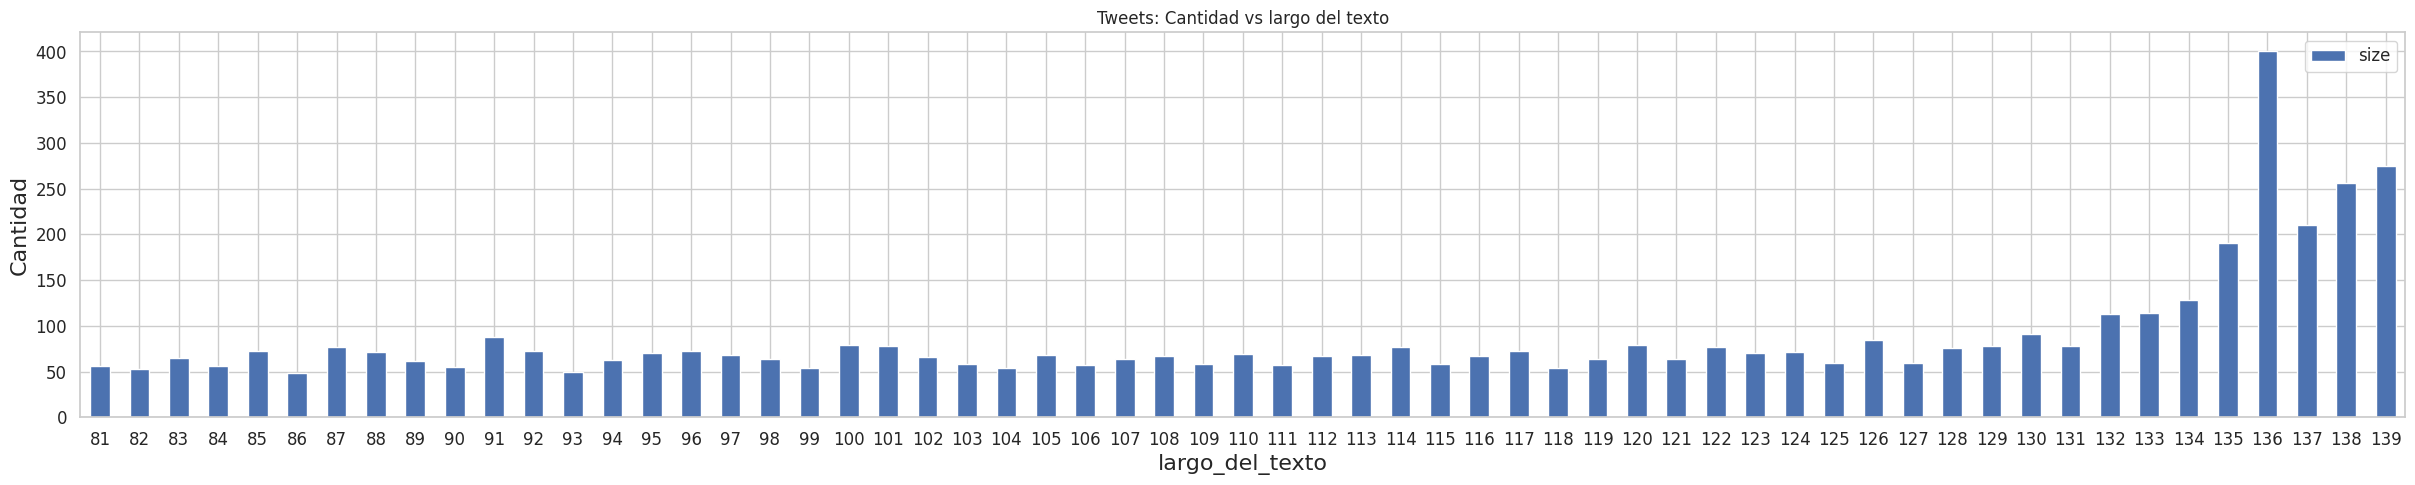

In [201]:
cantidad_de_tweets2 = df_ext.loc[(df_ext.largo_del_texto > 80) & (df_ext.largo_del_texto < 140)]
cantidad_de_tweets2 = cantidad_de_tweets2.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets2.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Tweets: Cantidad vs largo del texto")
plt.ylabel('Cantidad')


Text(0, 0.5, 'Cantidad')

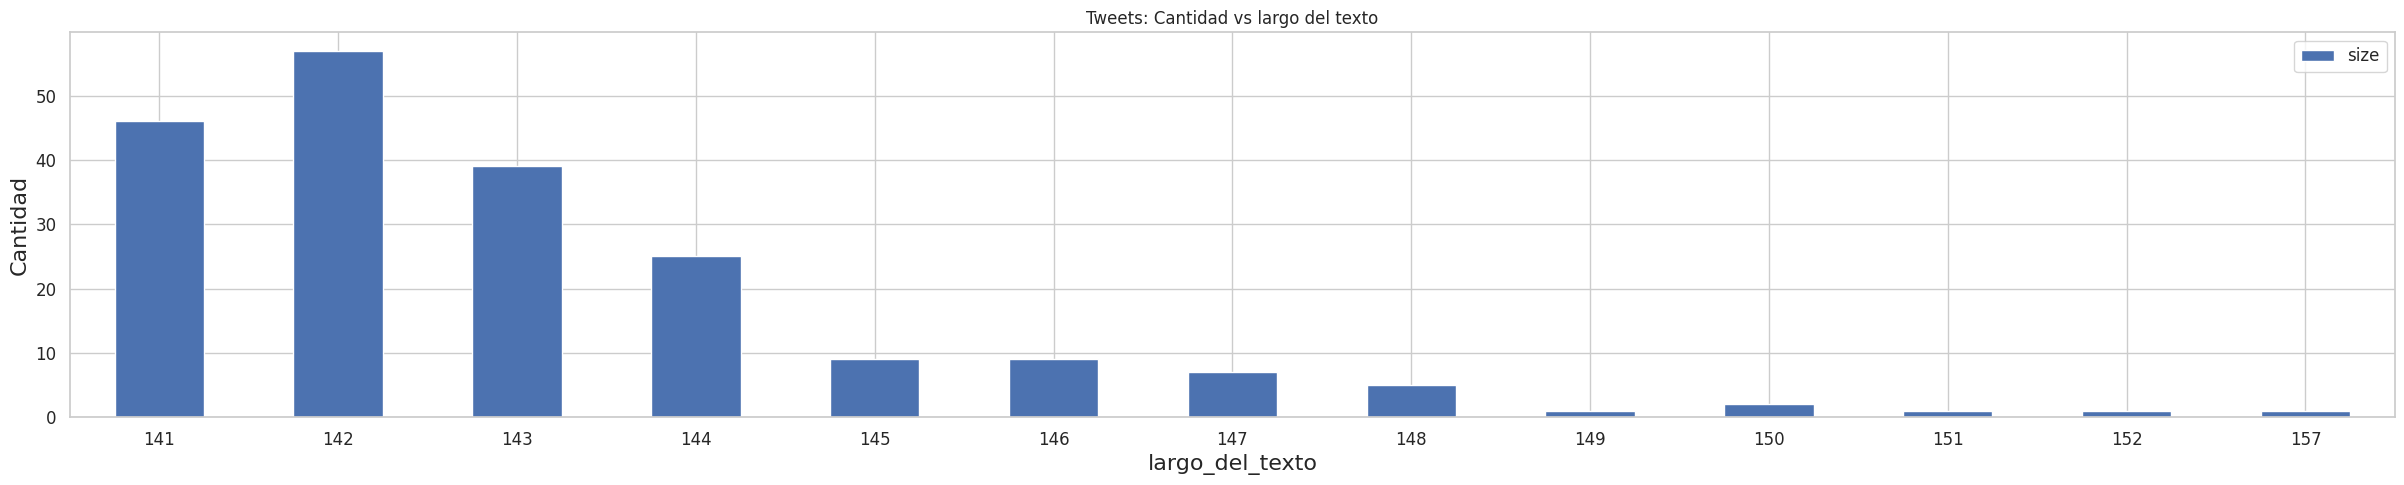

In [202]:
cantidad_de_tweets3 = df_ext.loc[(df_ext.largo_del_texto > 140)]
cantidad_de_tweets3 = cantidad_de_tweets3.groupby(['largo_del_texto'])['largo_del_texto'].agg(['size'])
cantidad_de_tweets3.plot(kind = 'bar', figsize = (30, 5), rot = 0, title = "Tweets: Cantidad vs largo del texto")
plt.ylabel('Cantidad')

Podemos observar que hasta los 130 caracteres, las cantidades no se diferencian demasiado, siempre estan por debajo de 100, luego hay un crecimiento considerable y luego vuelve a bajar.
Mejorar

In [182]:
df_verdaderos = df_ext[df_ext['target'] == 1].groupby(['largo_del_texto'])['target'].agg(['size'])
df_falsos = df_ext[df_ext['target'] == 0].groupby(['largo_del_texto'])['target'].agg(['size'])

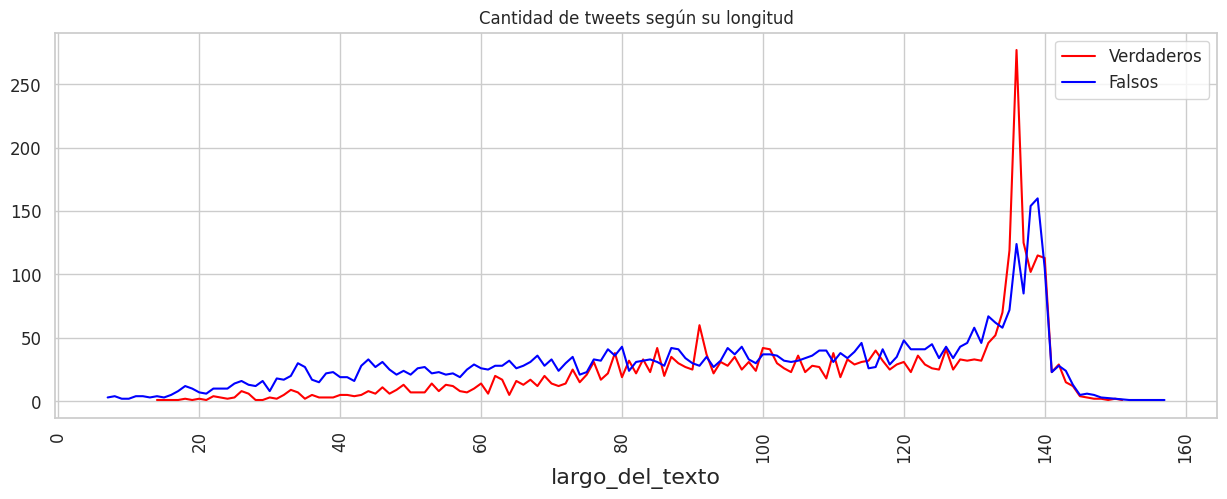

In [183]:
df_verdaderos['size'].plot(figsize = (15,5), rot = 90, title = "Cantidad de tweets según su longitud", color = "Red",label = 'Verdaderos', legend = ' ')
df_falsos['size'].plot(figsize = (15,5), rot = 90, color = "Blue",label = 'Falsos', legend = ' ')

Podemos observar que hasta los 65 caracteres, los tweets falsos siempre están por encima de los verdaderos por una ligera diferencia, luego esa diferencia se achica pero a partir de los 130, ocurre un pico importante en el que los tweets verdaderos superan ampliamente a los falsos.

Lo graficaremos con barras para que se aprecie mejor, en este caso solo nos quedaremos con la ultima sección que es la que nos interesa.

In [184]:
df_largo = df_ext.loc[(df_ext.largo_del_texto > 99) & (df_ext.largo_del_texto < 141)]
df_largo = df_largo.groupby(['largo_del_texto', 'target']).agg({'target': 'count'})
df_largo = df_largo.unstack(level=1)
df_largo = df_largo.reset_index()
df_largo = df_largo.droplevel(0, axis=1)
df_largo.columns=['largo_del_texto', 'Tweets falsos', 'Tweets verdaderos'] 
df_largo['Tweets verdaderos'].fillna(0, inplace=True)
df_largo['Tweets falsos'].fillna(0, inplace=True)
df_largo['largo_del_texto'].fillna('empty', inplace=True)
df_largo = df_largo.set_index('largo_del_texto')
df_largo = df_largo.sort_values('largo_del_texto', ascending = True).head(ranking)

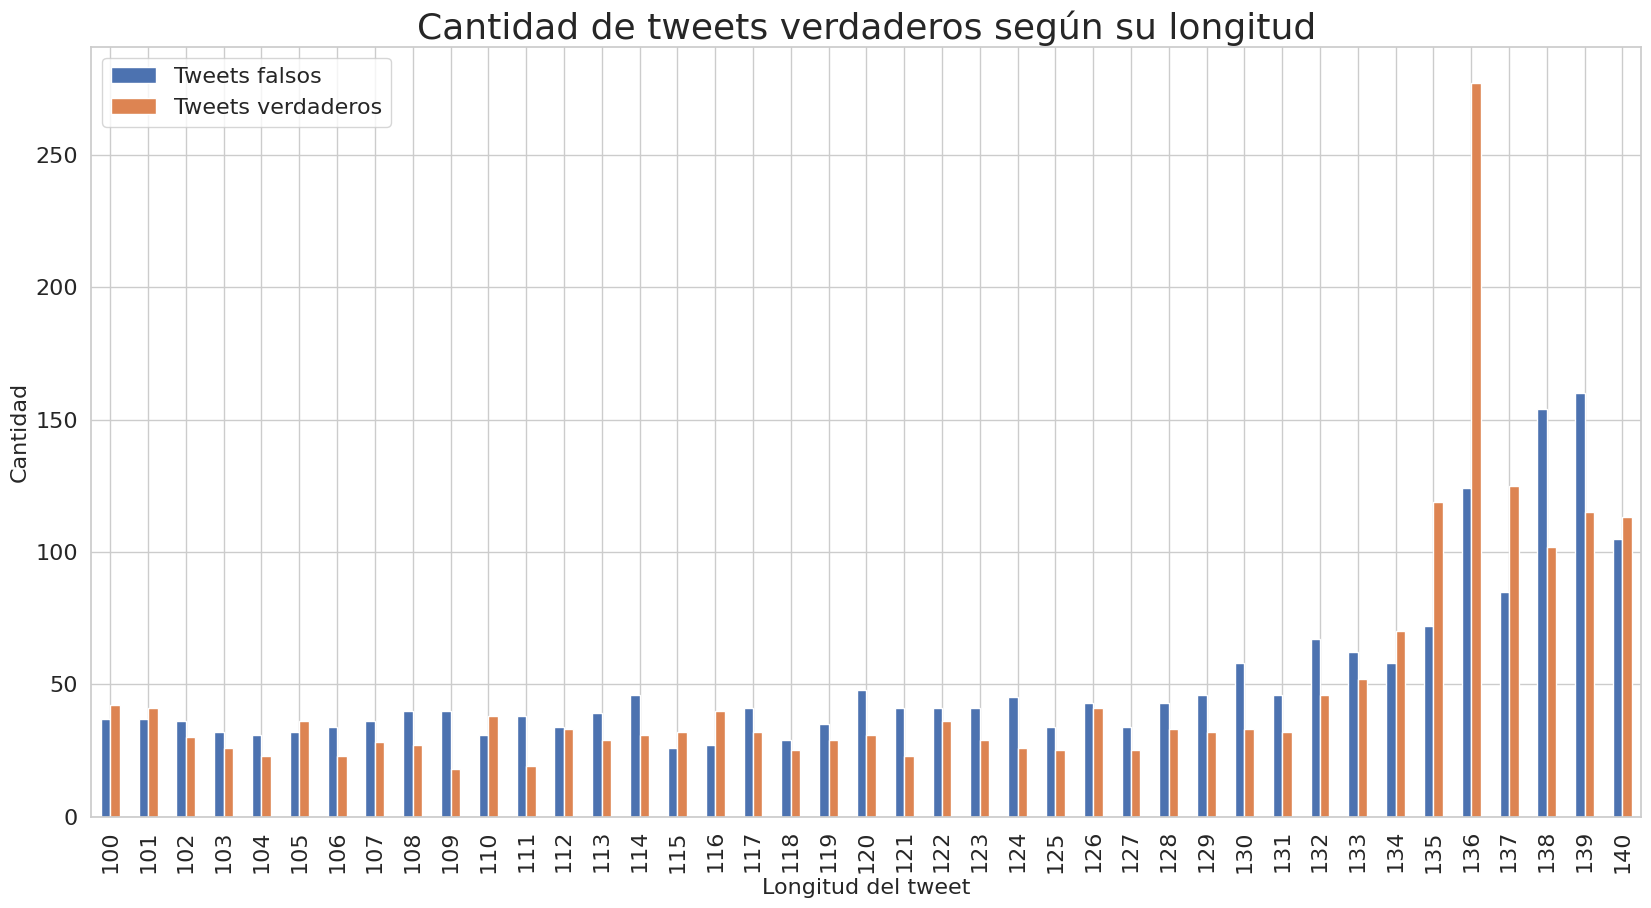

In [185]:
ax = df_largo.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Cantidad de tweets verdaderos según su longitud", fontsize=26)
plt.xlabel("Longitud del tweet", fontsize= 16)
plt.ylabel("Cantidad", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

Aquí se aprecia mejor que hasta los 134 caracteres, la diferencia es minima pero luego hay un importante crecimiento de los tweets verdaderos ( continuar ) 

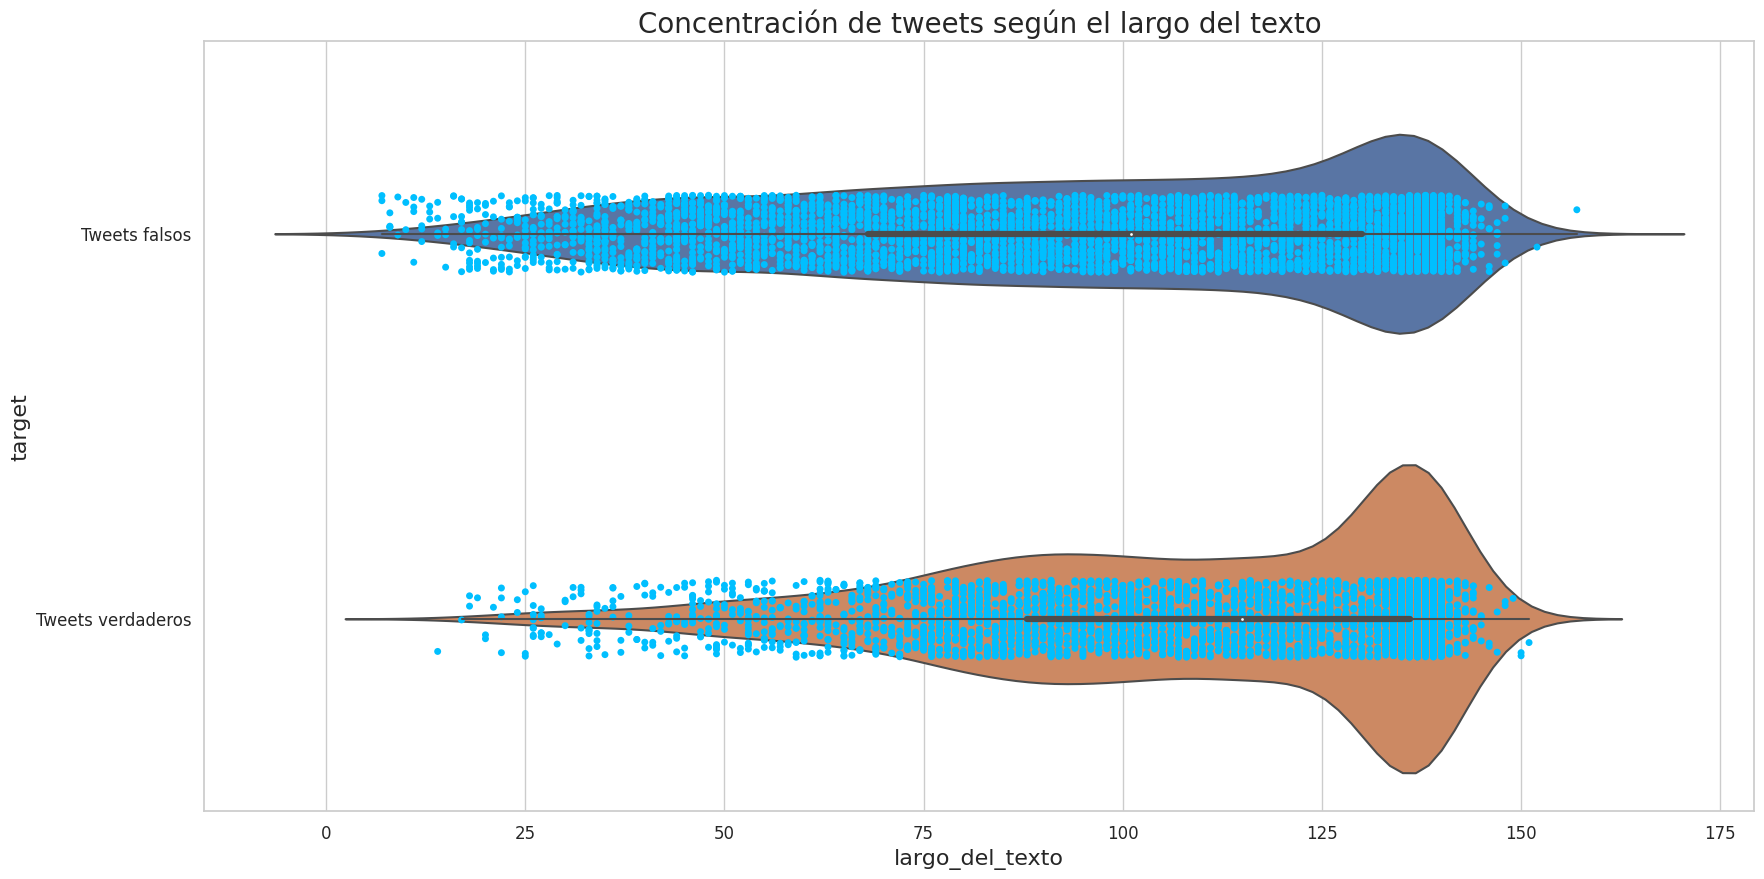

In [197]:
df_violin = df_ext[['largo_del_texto', 'target']]
df_violin = df_violin.sort_values(by='target', ascending=True)
df_violin['target'] = df_violin['target'].apply(lambda x: 'Tweets verdaderos' if x == 1 else 'Tweets falsos')
from matplotlib.collections import PathCollection

ax = sns.violinplot(x="largo_del_texto", y="target", data=df_violin)

plt.title('Concentración de tweets según el largo del texto', fontsize=20)

for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

sns.stripplot(x="largo_del_texto", y="target", data=df_violin, jitter=True, ax=ax, color='deepskyblue')


In [198]:
df_true= df_ext[df_ext['target'] ==1]['largo_del_texto'].to_frame()
df_true.columns = ['Tweets verdaderos']
df_true.describe()

,Tweets verdaderos
count,"3,271.00"
mean,108.11
std,29.31
min,14.00
25%,88.00
50%,115.00
75%,136.00
max,151.00


In [199]:
df_falso= df_ext[df_ext['target'] ==0]['largo_del_texto'].to_frame()
df_falso.columns = ['Tweets falsos']
df_falso.describe()

,Tweets falsos
count,"4,342.00"
mean,95.71
std,35.89
min,7.00
25%,68.00
50%,101.00
75%,130.00
max,157.00


## 2.6 Relación entre location y keyword

In [186]:
df_loc_key = df.groupby(['location','keyword'])['keyword'].agg(['size'])
df_loc_key.columns = ['ocurrencia']
df_loc_key = df_loc_key.reset_index()

In [187]:
df_loc_key = df_loc_key.set_index(df_loc_key.keyword)

#df_usa = df_usa.drop(['location','keyword'], axis=1)
df_loc_key = df_loc_key.drop(['keyword'], axis=1)
df_loc_key = df_loc_key.loc[df_loc_key.ocurrencia > 5]
df_loc_key

,location,ocurrencia
keyword,,
derail,Road to the Billionaires Club,6
aftershock,304,9
derailment,India,7
loud%20bang,Kenya,16
detonate,"Morioh, Japan",6
...,...,...
wounds,sin location,6
wreck,sin location,10
wreckage,sin location,11


## 2.7 Relación entre la locación y el largo del texto

In [188]:
df_loc_largo = df_ext.groupby(['location','largo_del_texto'])['keyword'].agg(['size'])
df_loc_largo.columns = ['ocurrencia']
df_loc_largo = df_loc_largo.reset_index()
df_loc_largo = df_loc_largo.loc[df_loc_largo.largo_del_texto > 100]

In [189]:
df_loc_largo = df_loc_largo.set_index(df_loc_largo.largo_del_texto)

#df_usa = df_usa.drop(['location','keyword'], axis=1)
df_loc_largo = df_loc_largo.drop(['largo_del_texto'], axis=1)
df_loc_largo = df_loc_largo.loc[df_loc_largo.ocurrencia > 3]
df_loc_largo

,location,ocurrencia
largo_del_texto,,
103,Happily Married with 2 kids,4
135,London,4
136,Mumbai,12
133,New York,4
138,New York,4
139,New York,42
136,Nigeria,4
140,Nigeria,6
134,Pedophile hunting ground,4
